<a href="https://colab.research.google.com/github/tiwanaam/amritor/blob/master/Project_CHL5230H_F23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Final Project, Prototype 1**
<b> Team: </b> Sarra Ali, Amrit Tiwana, Konrad Samsel <br>
<b> Student Numbers: </b> , 1009571571, 1004041967<br>
<b> Team Number: </b> #19 <br>
<b> Course: </b> CHL5239 Fall 2023<br>
<b> Date: </b> 2023-10-26 <br>
<br>

<h5> <b> Basic Features of Data Analysis Project:</b></h5>
<b> Dataset: </b> Diabetes Study File 10 (December 14 2017)<br>
<b> Outcome of Interest: </b> Diagnosis of Depression (Binary)<br> <br>
<b> Focal ML Model: </b> Logistic Regression with K-means for feature clustering <br>
<b> Comparator Model: </b> Random Forest

# Section A1 - Data Loading and Preliminary Exploration

**Import Libraries**

In [ ]:
#IMPORT LIBRARY (ORGANIZED BY MODULE) - Some may be imported later on as needed

#Import libraries - Basic
from google.colab import files
import io #import direct
import os
import numpy as np
import pandas as pd

#Import Libraries - Data Visualization
import plotly.express as px
import seaborn as sns
import scipy.stats as stats

#Import Libraries - Logistic Lecture
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import warnings

#Import the necessary libraries - Misc
import statsmodels.api as sm
from sklearn.discriminant_analysis import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import RocCurveDisplay, auc, roc_curve
import re


warnings.filterwarnings('ignore')

**Load the Data**

In [ ]:
# Upload Options
user_choice = input("Specify user (K, S, A): ")

if user_choice == 'A':
    # Option A: Upload a file
    uploaded = files.upload()
    data = pd.read_excel(io.BytesIO(uploaded['Diabetes Study File 10K Dec 14 2017.xlsx'])) #Amrit File Path
elif user_choice == 'K':
    # Option K: Mount Google Drive - Konrad
    from google.colab import drive
    drive.mount('/content/drive')
    data = pd.read_excel("drive/My Drive/ML Course/Assignment/Diabetes Study File 10K.xlsx") #Konrad File Path
elif user_choice == 'S':
    # Load data
    data = pd.read_excel('data.xlsx')
else:
    print("Invalid choice. Please specify user (K, S, A) and try again.")

data.head()
data.shape # Check, Dimensions = 10,000 obs c 43 vars



Specify user (K, S, A): A


Saving Diabetes Study File 10K Dec 14 2017.xlsx to Diabetes Study File 10K Dec 14 2017.xlsx


(10000, 43)

In [ ]:
pd.set_option('display.max_columns', None)
data.head()

,Age_at_Exam,sBP,sBP_Date,BMI,BMI_Date,LDL,LDL_Date,HDL,HDL_Date,A1c,A1c_Date,TG,TG_Date,FBS,FBS_Date,FBS>DM,Total_Cholesterol,Total_Cholesterol_Lab_Date,Diabetes,DM_OnsetDate,Depression,Depression_OnsetDate,HTN,HTN_OnsetDate,OA,OA_OnsetDate,COPD,COPD_Date,Hypertension_Medications,Hypertension_Medications_First_Instance,Corticosteroids,Corticosteroids_first_instance,Sex,leastO(A1c_Date),leastO(DM_OnsetDate),leastO(FBS_Date),LeastOfAll,A1C_BEF_DM,FBS_BEF_DM,Patient_ID,DM_Onset_Revised,DM_Onset_Revised_1YrPrior,DIABETES
0,65,126.0,2013-06-11,31.000000,2013-06-11,1.66,2013-06-14,1.11,2013-06-14,5.4,2013-06-14,2.28,2013-06-14,5.8,2013-06-14,1,3.81,2013-06-14,0,NaT,0,NaT,0,NaT,0,NaT,0,NaT,NaN,NaT,NaN,NaT,Female,NaN,NaN,NaN,NaN,NaN,NaN,4001000000255903,NaT,NaT,No
1,62,135.0,2014-06-19,25.846483,2014-10-17,2.49,2014-05-28,1.37,2014-05-28,5.8,2014-10-25,1.37,2014-05-28,5.4,2014-05-28,1,4.48,2014-05-28,0,NaT,0,NaT,1,2014-01-27,0,NaT,0,NaT,FUROSEMIDE,2014-06-19,NaN,NaT,Female,NaN,NaN,NaN,NaN,NaN,NaN,4001000000256456,NaT,NaT,No
2,63,133.0,2012-07-31,30.900000,2011-12-01,1.65,2012-06-01,NaN,NaT,6.1,2012-06-01,0.76,2012-06-01,5.6,2012-06-01,1,NaN,NaT,0,NaT,0,NaT,1,2014-05-21,0,NaT,1,2005-04-08,METOPROLOL / RAMIPRIL / LOSARTAN,2005-01-11,NaN,NaT,Male,NaN,NaN,NaN,NaN,NaN,NaN,1001000000000054,NaT,NaT,No
3,51,136.0,2014-01-06,56.710775,2014-01-06,2.80,2014-01-14,1.94,2014-01-14,6.0,2014-01-14,0.99,2014-01-14,6.0,2014-01-14,1,5.19,2014-01-14,0,NaT,0,NaT,0,NaT,0,NaT,0,NaT,NaN,NaT,NaN,NaT,Female,NaN,NaN,NaN,NaN,NaN,NaN,4001000000259496,NaT,NaT,No
4,40,123.0,2015-06-12,33.067867,2015-06-12,2.48,2015-06-24,1.17,2015-06-24,5.8,2015-06-24,1.04,2015-06-24,5.2,2015-06-24,1,4.12,2015-06-24,0,NaT,1,2013-06-28,0,NaT,0,NaT,0,NaT,NaN,NaT,NaN,NaT,Female,NaN,NaN,NaN,NaN,NaN,NaN,4001000000262094,NaT,NaT,No


# Section A2 - Subset Data

**Subset Data for Diabetes and Prediabetes Only**

In [ ]:
#Create the 'Diabetes2' variable
data['Diabetes2'] = 0
data.loc[(data['A1c'] >= 5.7) & (data['A1c'] <= 6.4) & (data['Diabetes'] == 0), 'Diabetes2'] = 1
data.loc[(data['A1c'] >= 5.7) & (data['Diabetes'] == 0), 'Diabetes2'] = 1
data.loc[data['Diabetes'] == 1, 'Diabetes2'] = 2

#There are two diabetes varaibles, will do cross tab to make things match
pd.crosstab(data['DIABETES'], data['Diabetes']) #Match, can drop either

Diabetes,0,1
DIABETES,,
No,4861,0
Yes,0,5139


In [ ]:
#Delete unnecessary variables from the dataset
# DeleteList=['sBP', 'sBP_Date', 'BMI_Date', 'LDL', 'LDL_Date',
#        'HDL', 'HDL_Date', 'A1c_Date', 'TG', 'TG_Date',
#        'FBS_Date', 'FBS>DM', 'Total_Cholesterol_Lab_Date',
#        'DM_OnsetDate', 'Depression_OnsetDate',
#        'HTN_OnsetDate', 'OA_OnsetDate', 'COPD_Date',
#        'Hypertension_Medications', 'Hypertension_Medications_First_Instance',
#        'Corticosteroids', 'Corticosteroids_first_instance',
#        'leastO(A1c_Date)', 'leastO(DM_OnsetDate)', 'leastO(FBS_Date)',
#        'LeastOfAll', 'A1C_BEF_DM', 'FBS_BEF_DM',
#        'DM_Onset_Revised', 'DM_Onset_Revised_1YrPrior', 'DIABETES', 'Diabetes', 'Patient_ID']

#Delete unnecessary variables from the dataset

DeleteList=[
       'leastO(A1c_Date)', 'leastO(DM_OnsetDate)', 'leastO(FBS_Date)',
       'LeastOfAll', 'A1C_BEF_DM', 'FBS_BEF_DM',
       'DM_Onset_Revised', 'DM_Onset_Revised_1YrPrior', 'DIABETES', 'Patient_ID']

data = data.drop(DeleteList, axis=1)

In [ ]:
# Only keep observations where Diabetes2 does not equal 0
data = data[data['Diabetes2'] != 0]

In [ ]:
#Check, Dimentions = 7862 obs x 34
data.shape

(7862, 34)

# Section A3 - Feature Engineering

**Feature Engineering** - Section A3-1 - Hypertension Medications

In [ ]:
#Expand medications to single binary variables - HTN Part 1: get names

#Hypertension medication set  - create
hypertension_medication_set = set()

#Iterate through the 'Hypertension_Medications' column
for medication in data['Hypertension_Medications']:
    if isinstance(medication, str):  # Check if it's a string
        # Transformations for specific cases
        medication = medication.replace("DIURETICS", "DIURETIC")
        medication = medication.replace(", COMBINATIONS", "").strip()
        medication = medication.replace("OTHER DIURETICS", "DIURETIC")
        medication = medication.replace("OTHER DIURETIC", "DIURETIC")

        # Split medications if multiple are listed in a single cell
        medications = medication.split('/')

        # Add each medication to the set
        for med in medications:
            med = med.strip()  # Remove leading/trailing spaces

            # Split medication after "AND" and add each part if it's not already added
            if " AND " in med:
                # Split medication and diuretics
                med_parts = med.split(" AND ")
                for part in med_parts:
                    part = part.strip()  # Remove leading/trailing spaces
                    if part not in hypertension_medication_set:
                        hypertension_medication_set.add(part)
            else:
                if med not in hypertension_medication_set:
                    hypertension_medication_set.add(med)


# Print the unique hypertension medications set
hypertension_medication_set = sorted(hypertension_medication_set)
print(hypertension_medication_set)
print(len(hypertension_medication_set))


['ACEBUTOLOL', 'ALISKIREN', 'AMILORIDE', 'AMLODIPINE', 'ATENOLOL', 'BENAZEPRIL', 'BETAXOLOL', 'BISOPROLOL', 'CANDESARTAN', 'CAPTOPRIL', 'CARVEDILOL', 'CILAZAPRIL', 'DILTIAZEM', 'DIURETIC', 'DOXAZOSIN', 'ENALAPRIL', 'EPLERENONE', 'EPROSARTAN', 'ETACRYNIC ACID', 'FELODIPINE', 'FOSINOPRIL', 'FUROSEMIDE', 'HYDROCHLOROTHIAZIDE', 'IRBESARTAN', 'LABETALOL', 'LISINOPRIL', 'LOSARTAN', 'METOPROLOL', 'NADOLOL', 'NIFEDIPINE', 'OLMESARTAN MEDOXOMIL', 'PERINDOPRIL', 'PINDOLOL', 'POTASSIUM-SPARING AGENTS', 'PRAZOSIN', 'PROPRANOLOL', 'QUINAPRIL', 'RAMIPRIL', 'SOTALOL', 'SPIRONOLACTONE', 'TELMISARTAN', 'TIMOLOL', 'TRANDOLAPRIL', 'TRIAMTERENE', 'VALSARTAN', 'VERAPAMIL']
46


In [ ]:
#Expand medications to single binary variables - HTN Part 2: create vars

for medication in hypertension_medication_set:
    # Create a new column for the current medication, initialized to 0
    data['HTRX_' + medication] = 0  # Initialize to 0 by default

    # Check if the medication is not null (not NaN)
    not_null_mask = data['Hypertension_Medications'].notnull()

    # Apply the .str.contains() and .astype(int) operations only to non-null values
    data.loc[not_null_mask, 'HTRX_' + medication] = data.loc[not_null_mask, 'Hypertension_Medications'].str.contains(medication).astype(int)

data.shape #Check, Dimentions = 7862 obs x 80
data.head()

#check to see if theres enough observations for each
htrx_columns = data.filter(like='HTRX_')
count_dict = {col: (htrx_columns[col] == 1).sum() for col in htrx_columns.columns}

print(count_dict)
print(len(count_dict))

# Select keys with counts less than 10
HTN_keys_todrop = [key for key, value in count_dict.items() if value < 10]
print(HTN_keys_todrop)

data.drop(columns=[col for col in data.columns if col in HTN_keys_todrop], inplace=True)
data.shape #72 columns, 38 new variables - binary (presence/absence)

{'HTRX_ACEBUTOLOL': 53, 'HTRX_ALISKIREN': 37, 'HTRX_AMILORIDE': 1, 'HTRX_AMLODIPINE': 1857, 'HTRX_ATENOLOL': 695, 'HTRX_BENAZEPRIL': 13, 'HTRX_BETAXOLOL': 5, 'HTRX_BISOPROLOL': 627, 'HTRX_CANDESARTAN': 308, 'HTRX_CAPTOPRIL': 3, 'HTRX_CARVEDILOL': 95, 'HTRX_CILAZAPRIL': 54, 'HTRX_DILTIAZEM': 500, 'HTRX_DIURETIC': 1373, 'HTRX_DOXAZOSIN': 85, 'HTRX_ENALAPRIL': 276, 'HTRX_EPLERENONE': 9, 'HTRX_EPROSARTAN': 19, 'HTRX_ETACRYNIC ACID': 2, 'HTRX_FELODIPINE': 72, 'HTRX_FOSINOPRIL': 74, 'HTRX_FUROSEMIDE': 829, 'HTRX_HYDROCHLOROTHIAZIDE': 2246, 'HTRX_IRBESARTAN': 671, 'HTRX_LABETALOL': 40, 'HTRX_LISINOPRIL': 292, 'HTRX_LOSARTAN': 409, 'HTRX_METOPROLOL': 1029, 'HTRX_NADOLOL': 45, 'HTRX_NIFEDIPINE': 477, 'HTRX_OLMESARTAN MEDOXOMIL': 147, 'HTRX_PERINDOPRIL': 972, 'HTRX_PINDOLOL': 9, 'HTRX_POTASSIUM-SPARING AGENTS': 176, 'HTRX_PRAZOSIN': 9, 'HTRX_PROPRANOLOL': 87, 'HTRX_QUINAPRIL': 126, 'HTRX_RAMIPRIL': 2324, 'HTRX_SOTALOL': 50, 'HTRX_SPIRONOLACTONE': 240, 'HTRX_TELMISARTAN': 380, 'HTRX_TIMOLOL': 82,

(7862, 72)

**Feature Engineering** - Section A3-2 - Corticosteroid Medications

In [ ]:
#Expand medications to single binary variables - CST Part 1: get names

# Corticosteroids medication set - create
corticosteroids_medication_set = set()

# Iterate through the 'Corticosteroids' column
for medication in data['Corticosteroids']:
    if isinstance(medication, str):  # Check if string
        # Transformations for specific cases
        medication = medication.replace(", COMBINATIONS", "").strip()
        medication = medication.replace(",", "/")
        medication = medication.replace("AND", "/")
        # Split medications if multl are listed in a single cell
        medications = medication.split('/')

        # Add each medication to the set
        for med in medications:
            med = med.strip()  # Remove leading/trailing spaces
            if med not in corticosteroids_medication_set:
                corticosteroids_medication_set.add(med)

# Print the unique corticosteroids medications set
corticosteroids_medication_set = sorted(corticosteroids_medication_set)
print(corticosteroids_medication_set)
print(len(corticosteroids_medication_set))


['ANTIBIOTICS', 'ANTIINFECTIVES', 'CORTISONE', 'DEXAMETHASONE', 'HYDROCORTISONE', 'METHYLPREDNISOLONE', 'PREDNISOLONE', 'PREDNISONE']
8


In [ ]:
#Expand medications to single binary variables - CST Part 1: create vars

for medication in corticosteroids_medication_set:
    # Create a new column for the current medication, initialized to 0
    data['CSRX_' + medication] = 0  # Initialize to 0 by default

    # Check if the medication is not null (not NaN)
    not_null_mask = data['Corticosteroids'].notnull()

    # Use regular expressions with word boundaries to match complete words
    pattern = r'\b' + re.escape(medication) + r'\b'
    data.loc[not_null_mask, 'CSRX_' + medication] = data.loc[not_null_mask, 'Corticosteroids'].str.contains(pattern, case=False, regex=True).astype(int)

# Check DataFrame
data.shape
data.head()

# Check to see if there are enough observations for each corticosteroid variable
csrx_columns = data.filter(like='CSRX')
count_dict = {col: (csrx_columns[col] == 1).sum() for col in csrx_columns.columns}

print(count_dict)
print(len(count_dict))

# Select keys with counts less than 10 for corticosteroids
CSRX_keys_todrop = [key for key, value in count_dict.items() if value < 10]
print(CSRX_keys_todrop) #all above 10, but will keep code below in case new data comes in

# Drop columns with counts less than 10
data.drop(columns=[col for col in data.columns if col in CSRX_keys_todrop], inplace=True)
data.shape  # 72 columns, including the 38 new binary variables (presence/absence) for corticosteroids

{'CSRX_ANTIBIOTICS': 205, 'CSRX_ANTIINFECTIVES': 398, 'CSRX_CORTISONE': 8, 'CSRX_DEXAMETHASONE': 368, 'CSRX_HYDROCORTISONE': 1345, 'CSRX_METHYLPREDNISOLONE': 352, 'CSRX_PREDNISOLONE': 32, 'CSRX_PREDNISONE': 663}
8
['CSRX_CORTISONE']


(7862, 79)

In [ ]:
pd.set_option('display.max_columns', None)
data.head()

,Age_at_Exam,sBP,sBP_Date,BMI,BMI_Date,LDL,LDL_Date,HDL,HDL_Date,A1c,A1c_Date,TG,TG_Date,FBS,FBS_Date,FBS>DM,Total_Cholesterol,Total_Cholesterol_Lab_Date,Diabetes,DM_OnsetDate,Depression,Depression_OnsetDate,HTN,HTN_OnsetDate,OA,OA_OnsetDate,COPD,COPD_Date,Hypertension_Medications,Hypertension_Medications_First_Instance,Corticosteroids,Corticosteroids_first_instance,Sex,Diabetes2,HTRX_ACEBUTOLOL,HTRX_ALISKIREN,HTRX_AMLODIPINE,HTRX_ATENOLOL,HTRX_BENAZEPRIL,HTRX_BISOPROLOL,HTRX_CANDESARTAN,HTRX_CARVEDILOL,HTRX_CILAZAPRIL,HTRX_DILTIAZEM,HTRX_DIURETIC,HTRX_DOXAZOSIN,HTRX_ENALAPRIL,HTRX_EPROSARTAN,HTRX_FELODIPINE,HTRX_FOSINOPRIL,HTRX_FUROSEMIDE,HTRX_HYDROCHLOROTHIAZIDE,HTRX_IRBESARTAN,HTRX_LABETALOL,HTRX_LISINOPRIL,HTRX_LOSARTAN,HTRX_METOPROLOL,HTRX_NADOLOL,HTRX_NIFEDIPINE,HTRX_OLMESARTAN MEDOXOMIL,HTRX_PERINDOPRIL,HTRX_POTASSIUM-SPARING AGENTS,HTRX_PROPRANOLOL,HTRX_QUINAPRIL,HTRX_RAMIPRIL,HTRX_SOTALOL,HTRX_SPIRONOLACTONE,HTRX_TELMISARTAN,HTRX_TIMOLOL,HTRX_TRANDOLAPRIL,HTRX_VALSARTAN,HTRX_VERAPAMIL,CSRX_ANTIBIOTICS,CSRX_ANTIINFECTIVES,CSRX_DEXAMETHASONE,CSRX_HYDROCORTISONE,CSRX_METHYLPREDNISOLONE,CSRX_PREDNISOLONE,CSRX_PREDNISONE
1,62,135.0,2014-06-19,25.846483,2014-10-17,2.49,2014-05-28,1.37,2014-05-28,5.8,2014-10-25,1.37,2014-05-28,5.4,2014-05-28,1,4.48,2014-05-28,0,NaT,0,NaT,1,2014-01-27,0,NaT,0,NaT,FUROSEMIDE,2014-06-19,NaN,NaT,Female,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,63,133.0,2012-07-31,30.900000,2011-12-01,1.65,2012-06-01,NaN,NaT,6.1,2012-06-01,0.76,2012-06-01,5.6,2012-06-01,1,NaN,NaT,0,NaT,0,NaT,1,2014-05-21,0,NaT,1,2005-04-08,METOPROLOL / RAMIPRIL / LOSARTAN,2005-01-11,NaN,NaT,Male,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,51,136.0,2014-01-06,56.710775,2014-01-06,2.80,2014-01-14,1.94,2014-01-14,6.0,2014-01-14,0.99,2014-01-14,6.0,2014-01-14,1,5.19,2014-01-14,0,NaT,0,NaT,0,NaT,0,NaT,0,NaT,NaN,NaT,NaN,NaT,Female,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,40,123.0,2015-06-12,33.067867,2015-06-12,2.48,2015-06-24,1.17,2015-06-24,5.8,2015-06-24,1.04,2015-06-24,5.2,2015-06-24,1,4.12,2015-06-24,0,NaT,1,2013-06-28,0,NaT,0,NaT,0,NaT,NaN,NaT,NaN,NaT,Female,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,60,130.0,2013-12-09,67.751227,2013-10-23,2.20,2013-11-04,1.38,2013-11-04,6.1,2013-11-04,0.76,2013-11-04,5.4,2013-11-04,1,3.93,2013-11-04,0,NaT,0,NaT,1,2013-04-22,0,NaT,0,NaT,ATENOLOL / NIFEDIPINE,2013-12-02,NaN,NaT,Female,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Feature Engineering** - Section A3-3 - Years Living with Comorbidities

In [ ]:
#List of datetime columns for lab value collection and anthropromophic measures, aim to get average OBS DATE
date_columns = ['sBP_Date', 'BMI_Date', 'LDL_Date', 'HDL_Date', 'A1c_Date', 'TG_Date', 'Total_Cholesterol_Lab_Date']

#Check for missing values in the datetime columns
missing_values = data[date_columns].isnull().sum()
print(missing_values)

#Create a new column 'OBS_DATE' with the most recent date from the specified columns
data['OBS_DATE'] = data[date_columns].apply(lambda row: pd.to_datetime(row).max(), axis=1)

#Check for missing values in the 'OBS_DATE' column
missing_values = data['OBS_DATE'].isnull().sum()
print(f"Missing values in OBS_DATE: {missing_values}")

sBP_Date                        0
BMI_Date                        0
LDL_Date                        0
HDL_Date                       36
A1c_Date                        0
TG_Date                        24
Total_Cholesterol_Lab_Date    141
dtype: int64
Missing values in OBS_DATE: 0


In [ ]:
# Calculate years for each condition only for those with a diagnosis of 1
data['Diabetes_YRS'] = 0  # Initialize to 0
data.loc[data['Diabetes'] == 1, 'Diabetes_YRS'] = (data['OBS_DATE'] - data['DM_OnsetDate']).dt.days / 365.0
data['Diabetes_YRS'] = data['Diabetes_YRS'].apply(lambda x: max(0, x))  # Convert negative values to 0

data['HTN_YRS'] = 0  # Initialize to 0
data.loc[data['HTN'] == 1, 'HTN_YRS'] = (data['OBS_DATE'] - data['HTN_OnsetDate']).dt.days / 365.0
data['HTN_YRS'] = data['HTN_YRS'].apply(lambda x: max(0, x))  # Convert negative values to 0

data['OA_YRS'] = 0  # Initialize to 0
data.loc[data['OA'] == 1, 'OA_YRS'] = (data['OBS_DATE'] - data['OA_OnsetDate']).dt.days / 365.0
data['OA_YRS'] = data['OA_YRS'].apply(lambda x: max(0, x))  # Convert negative values to 0

data['COPD_YRS'] = 0  # Initialize to 0
data.loc[data['COPD'] == 1, 'COPD_YRS'] = (data['OBS_DATE'] - data['COPD_Date']).dt.days / 365.0
data['COPD_YRS'] = data['COPD_YRS'].apply(lambda x: max(0, x))  # Convert negative values to 0

# Round the years to 1 decimal place
data['Diabetes_YRS'] = data['Diabetes_YRS'].round(1)
data['HTN_YRS'] = data['HTN_YRS'].round(1)
data['OA_YRS'] = data['OA_YRS'].round(1)
data['COPD_YRS'] = data['COPD_YRS'].round(1)



In [ ]:
#Delete unnecessary variables
DeleteList = ['sBP_Date', 'BMI_Date', 'LDL_Date', 'HDL_Date', 'A1c_Date', 'TG_Date', 'FBS_Date', 'Total_Cholesterol_Lab_Date','DM_OnsetDate', 'Depression_OnsetDate', 'HTN_OnsetDate', 'OA_OnsetDate', 'COPD_Date', 'Hypertension_Medications', 'Hypertension_Medications_First_Instance', 'Corticosteroids', 'Corticosteroids_first_instance']

data = data.drop(DeleteList, axis=1)

In [ ]:
data.head()

,Age_at_Exam,sBP,BMI,LDL,HDL,A1c,TG,FBS,FBS>DM,Total_Cholesterol,Diabetes,Depression,HTN,OA,COPD,Sex,Diabetes2,HTRX_ACEBUTOLOL,HTRX_ALISKIREN,HTRX_AMLODIPINE,HTRX_ATENOLOL,HTRX_BENAZEPRIL,HTRX_BISOPROLOL,HTRX_CANDESARTAN,HTRX_CARVEDILOL,HTRX_CILAZAPRIL,HTRX_DILTIAZEM,HTRX_DIURETIC,HTRX_DOXAZOSIN,HTRX_ENALAPRIL,HTRX_EPROSARTAN,HTRX_FELODIPINE,HTRX_FOSINOPRIL,HTRX_FUROSEMIDE,HTRX_HYDROCHLOROTHIAZIDE,HTRX_IRBESARTAN,HTRX_LABETALOL,HTRX_LISINOPRIL,HTRX_LOSARTAN,HTRX_METOPROLOL,HTRX_NADOLOL,HTRX_NIFEDIPINE,HTRX_OLMESARTAN MEDOXOMIL,HTRX_PERINDOPRIL,HTRX_POTASSIUM-SPARING AGENTS,HTRX_PROPRANOLOL,HTRX_QUINAPRIL,HTRX_RAMIPRIL,HTRX_SOTALOL,HTRX_SPIRONOLACTONE,HTRX_TELMISARTAN,HTRX_TIMOLOL,HTRX_TRANDOLAPRIL,HTRX_VALSARTAN,HTRX_VERAPAMIL,CSRX_ANTIBIOTICS,CSRX_ANTIINFECTIVES,CSRX_DEXAMETHASONE,CSRX_HYDROCORTISONE,CSRX_METHYLPREDNISOLONE,CSRX_PREDNISOLONE,CSRX_PREDNISONE,OBS_DATE,Diabetes_YRS,HTN_YRS,OA_YRS,COPD_YRS
1,62,135.0,25.846483,2.49,1.37,5.8,1.37,5.4,1,4.48,0,0,1,0,0,Female,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014-10-25,0.0,0.7,0.0,0.0
2,63,133.0,30.900000,1.65,NaN,6.1,0.76,5.6,1,NaN,0,0,1,0,1,Male,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012-07-31,0.0,0.0,0.0,7.3
3,51,136.0,56.710775,2.80,1.94,6.0,0.99,6.0,1,5.19,0,0,0,0,0,Female,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014-01-14,0.0,0.0,0.0,0.0
4,40,123.0,33.067867,2.48,1.17,5.8,1.04,5.2,1,4.12,0,1,0,0,0,Female,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015-06-24,0.0,0.0,0.0,0.0
5,60,130.0,67.751227,2.20,1.38,6.1,0.76,5.4,1,3.93,0,0,1,0,0,Female,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2013-12-09,0.0,0.6,0.0,0.0


# Section B - Data Exploration

**Data Exploration**

In [ ]:
# List the columns of the dataframe
print(data.columns)

htrx_columns = [col for col in data.columns if col.startswith('HTRX')]
print('total num columns for HT Medication (HTRX)')
print(len(htrx_columns))

csrx_columns = [col for col in data.columns if col.startswith('CSRX')]
print('total num columns for CS Medication (CSRX)')
print(len(csrx_columns))

Index(['Age_at_Exam', 'sBP', 'BMI', 'LDL', 'HDL', 'A1c', 'TG', 'FBS', 'FBS>DM',
       'Total_Cholesterol', 'Diabetes', 'Depression', 'HTN', 'OA', 'COPD',
       'Sex', 'Diabetes2', 'HTRX_ACEBUTOLOL', 'HTRX_ALISKIREN',
       'HTRX_AMLODIPINE', 'HTRX_ATENOLOL', 'HTRX_BENAZEPRIL',
       'HTRX_BISOPROLOL', 'HTRX_CANDESARTAN', 'HTRX_CARVEDILOL',
       'HTRX_CILAZAPRIL', 'HTRX_DILTIAZEM', 'HTRX_DIURETIC', 'HTRX_DOXAZOSIN',
       'HTRX_ENALAPRIL', 'HTRX_EPROSARTAN', 'HTRX_FELODIPINE',
       'HTRX_FOSINOPRIL', 'HTRX_FUROSEMIDE', 'HTRX_HYDROCHLOROTHIAZIDE',
       'HTRX_IRBESARTAN', 'HTRX_LABETALOL', 'HTRX_LISINOPRIL', 'HTRX_LOSARTAN',
       'HTRX_METOPROLOL', 'HTRX_NADOLOL', 'HTRX_NIFEDIPINE',
       'HTRX_OLMESARTAN MEDOXOMIL', 'HTRX_PERINDOPRIL',
       'HTRX_POTASSIUM-SPARING AGENTS', 'HTRX_PROPRANOLOL', 'HTRX_QUINAPRIL',
       'HTRX_RAMIPRIL', 'HTRX_SOTALOL', 'HTRX_SPIRONOLACTONE',
       'HTRX_TELMISARTAN', 'HTRX_TIMOLOL', 'HTRX_TRANDOLAPRIL',
       'HTRX_VALSARTAN', 'HTRX_VERAPA

In [ ]:
# Print the dimension of the dataset
print(data.shape)

(7862, 67)


In [ ]:
print(data.dtypes)

Age_at_Exam              int64
sBP                    float64
BMI                    float64
LDL                    float64
HDL                    float64
                     ...      
OBS_DATE        datetime64[ns]
Diabetes_YRS           float64
HTN_YRS                float64
OA_YRS                 float64
COPD_YRS               float64
Length: 67, dtype: object


Missing Data Check

In [ ]:
# Count the number of missing values (NaN or None) in each column of the 'data' DataFrame
pd.set_option('display.max_rows', None) #set max rows

missing_value_counts = data.isnull().sum()
missing_value_counts

# From the dataset, the following are missing: sBP = 3, LDL = 54, HDL = 44, TG = 34, Total_Cholesterol = 149 (to be dropped)

Age_at_Exam                        0
sBP                                3
BMI                                0
LDL                               54
HDL                               44
A1c                                0
TG                                34
FBS                                0
FBS>DM                             0
Total_Cholesterol                149
Diabetes                           0
Depression                         0
HTN                                0
OA                                 0
COPD                               0
Sex                                0
Diabetes2                          0
HTRX_ACEBUTOLOL                    0
HTRX_ALISKIREN                     0
HTRX_AMLODIPINE                    0
HTRX_ATENOLOL                      0
HTRX_BENAZEPRIL                    0
HTRX_BISOPROLOL                    0
HTRX_CANDESARTAN                   0
HTRX_CARVEDILOL                    0
HTRX_CILAZAPRIL                    0
HTRX_DILTIAZEM                     0
H

In [ ]:
# Calculate the percentage of rows with one or more missing values
percentage_missing_rows = (data.isnull().sum(axis=1) > 0).sum() / len(data)
percentage_missing_rows

#3% of rows are missing at least one value, not too severe

0.03218010684304248

In [ ]:
# full summary statistics
description = data.describe()
description

,Age_at_Exam,sBP,BMI,LDL,HDL,A1c,TG,FBS,FBS>DM,Total_Cholesterol,Diabetes,Depression,HTN,OA,COPD,Diabetes2,HTRX_ACEBUTOLOL,HTRX_ALISKIREN,HTRX_AMLODIPINE,HTRX_ATENOLOL,HTRX_BENAZEPRIL,HTRX_BISOPROLOL,HTRX_CANDESARTAN,HTRX_CARVEDILOL,HTRX_CILAZAPRIL,HTRX_DILTIAZEM,HTRX_DIURETIC,HTRX_DOXAZOSIN,HTRX_ENALAPRIL,HTRX_EPROSARTAN,HTRX_FELODIPINE,HTRX_FOSINOPRIL,HTRX_FUROSEMIDE,HTRX_HYDROCHLOROTHIAZIDE,HTRX_IRBESARTAN,HTRX_LABETALOL,HTRX_LISINOPRIL,HTRX_LOSARTAN,HTRX_METOPROLOL,HTRX_NADOLOL,HTRX_NIFEDIPINE,HTRX_OLMESARTAN MEDOXOMIL,HTRX_PERINDOPRIL,HTRX_POTASSIUM-SPARING AGENTS,HTRX_PROPRANOLOL,HTRX_QUINAPRIL,HTRX_RAMIPRIL,HTRX_SOTALOL,HTRX_SPIRONOLACTONE,HTRX_TELMISARTAN,HTRX_TIMOLOL,HTRX_TRANDOLAPRIL,HTRX_VALSARTAN,HTRX_VERAPAMIL,CSRX_ANTIBIOTICS,CSRX_ANTIINFECTIVES,CSRX_DEXAMETHASONE,CSRX_HYDROCORTISONE,CSRX_METHYLPREDNISOLONE,CSRX_PREDNISOLONE,CSRX_PREDNISONE,Diabetes_YRS,HTN_YRS,OA_YRS,COPD_YRS
count,7862.000000,7859.000000,7862.000000,7808.000000,7818.000000,7862.000000,7828.000000,7862.000000,7862.000000,7713.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000
mean,64.939201,131.052933,30.940435,2.450781,1.280404,6.505686,1.606578,6.631294,0.901806,4.452256,0.653650,0.206054,0.691809,0.334266,0.105317,1.653650,0.006741,0.004706,0.236199,0.088400,0.001654,0.079751,0.039176,0.012083,0.006868,0.063597,0.174637,0.010811,0.035106,0.002417,0.009158,0.009412,0.105444,0.285678,0.085347,0.005088,0.037141,0.052022,0.130883,0.005724,0.060672,0.018698,0.123633,0.022386,0.011066,0.016026,0.295599,0.006360,0.030527,0.048334,0.010430,0.013737,0.079496,0.009921,0.026075,0.050623,0.046807,0.171076,0.044772,0.004070,0.084330,1.818125,2.048308,0.677143,0.181404
std,12.327780,16.895566,6.836022,0.944484,0.378733,0.937055,0.989812,1.803888,0.297595,1.136858,0.475836,0.404496,0.461775,0.471763,0.306981,0.475836,0.081833,0.068444,0.424773,0.283894,0.040632,0.270924,0.194025,0.109265,0.082596,0.244049,0.379681,0.103421,0.184058,0.049104,0.095264,0.096566,0.307144,0.451765,0.279415,0.071151,0.189118,0.222086,0.337294,0.075443,0.238742,0.135463,0.329183,0.147945,0.104618,0.125585,0.456341,0.079499,0.172042,0.214484,0.101599,0.116404,0.270529,0.099116,0.159368,0.219241,0.211240,0.376599,0.206817,0.063672,0.277899,2.402258,2.600527,1.677895,0.834338
min,19.000000,71.000000,1.376352,0.070000,0.360000,4.400000,0.300000,3.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56.000000,120.000000,26.300000,1.750000,1.010000,5.900000,1.000000,5.500000,1.000000,3.610000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

# Data Representativity

In [ ]:
#Distribution and Representativity of Data

# Using groupby to calculate the average age by gender
avg_age_by_sex = data.groupby('Sex')['Age_at_Exam'].mean().reset_index()

# Create an interactive donut chart
fig_donut = px.pie(avg_age_by_sex, names='Sex', values='Age_at_Exam', title='Average Age by Gender', hole=0.5)

# Customizing the color and theme
fig_donut.update_traces(textinfo='percent+label', pull=[0, 0], marker=dict(colors=['#82153d', '#0d7b94']))
fig_donut.update_layout(template="plotly_white")

# Show the plot
fig_donut.show(renderer="colab")

# Distribution of Age by Gender
fig_box = px.box(data, x='Sex', y='Age_at_Exam', title='Box Plot of Age Grouped by Gender',
                 color='Sex', points="outliers", color_discrete_sequence=['#0d7b94', '#82153d'])
fig_box.update_layout(template="plotly_white")
fig_box.show()

In [ ]:
counts = data['Diabetes2'].value_counts()

# Define your color sequence
colors = ['#1c3a73', '#7cb1c2']

fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # size of the hole, 0.5 means 50%
    title='Distribution of Pre-Diabetes (1) and Diabetes (2)',
    color_discrete_sequence=colors  # apply your colors here
)

# Update layout for better appearance
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),  # Adjust top margin to make room for title
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='Diabetes Status'
    ),
    title=dict(
        text='Distribution of Pre-Diabetes (1) and Diabetes (2)',
        x=0.45,  # Centering the title
        xanchor='center',
        y=0.95,  # Adjusting y position to place title above chart
        yanchor='top',
        font=dict(size=16)
    ),
    width=500,
    height=350
)

fig.show()

In [ ]:
counts = data['Depression'].value_counts()

# Define colour
colors = ['#1c3a73', '#7cb1c2']

fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # size of the hole, 0.5 means 50%
    title='Distribution of Classes in "Depression"',
    color_discrete_sequence=colors  # apply colours
)

# Update layout for better appearance
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),  # Adjust top margin to make room for title
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='Depression'
    ),
    title=dict(
        text='Distribution of Classes in "Depression (1=Yes)',
        x=0.45,  # Centering the title
        xanchor='center',
        y=0.95,  # Adjusting y position to place title above chart
        yanchor='top',
        font=dict(size=16)
    ),
    width=500,
    height=350
)

fig.show()

In [ ]:
# Group the data by the "depression" variable
grouped_data = data.groupby('Depression')

variables = ["A1c"]

# Calculate summary statistics for each group
summary_stats_depres = grouped_data[variables].agg(['mean', 'std', 'min', 'max'])

print(summary_stats_depres)

# no significant differences between groups when stratified by outcome of interest

                 A1c                     
                mean       std  min   max
Depression                               
0           6.519864  0.940578  4.4  14.3
1           6.451056  0.921603  4.8  13.8


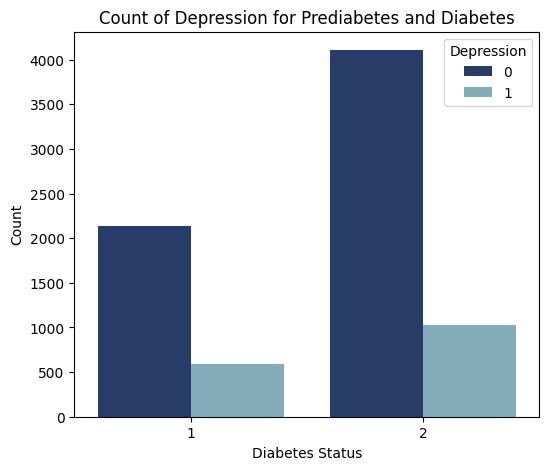

In [ ]:
# Define a list of colors
colors = ['#1c3a73', '#7cb1c2']

# Create the grouped bar chart using seaborn's countplot function
plt.figure(figsize=(6, 5))
sns.countplot(data=data, x='Diabetes2', hue='Depression', palette=colors)

plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.title('Count of Depression for Prediabetes and Diabetes')
plt.legend(title='Depression')
plt.show()

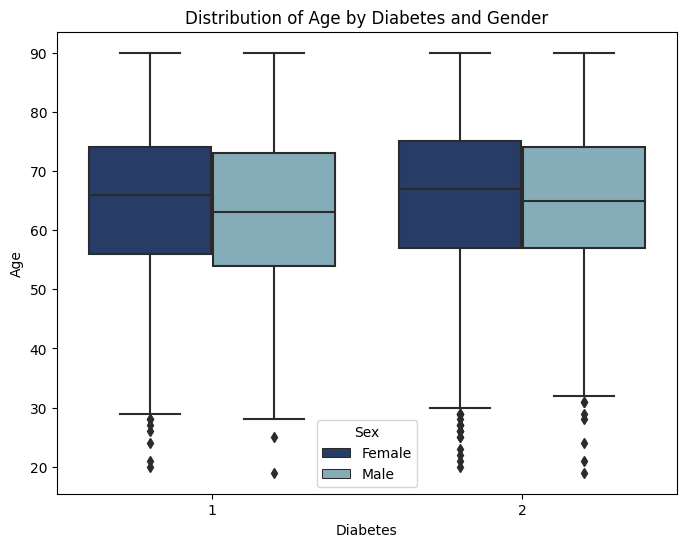

In [ ]:
# Define a custom color palette
custom_palette = ['#1c3a73', '#7cb1c2']

# Create the boxplot with the custom color palette
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Diabetes2', y='Age_at_Exam', hue='Sex', palette=custom_palette)

# Set labels and title
plt.xlabel('Diabetes')
plt.ylabel('Age')
plt.title('Distribution of Age by Diabetes and Gender')

# Show the plot
plt.show()

# Taking a Closer Look at Continous Vars

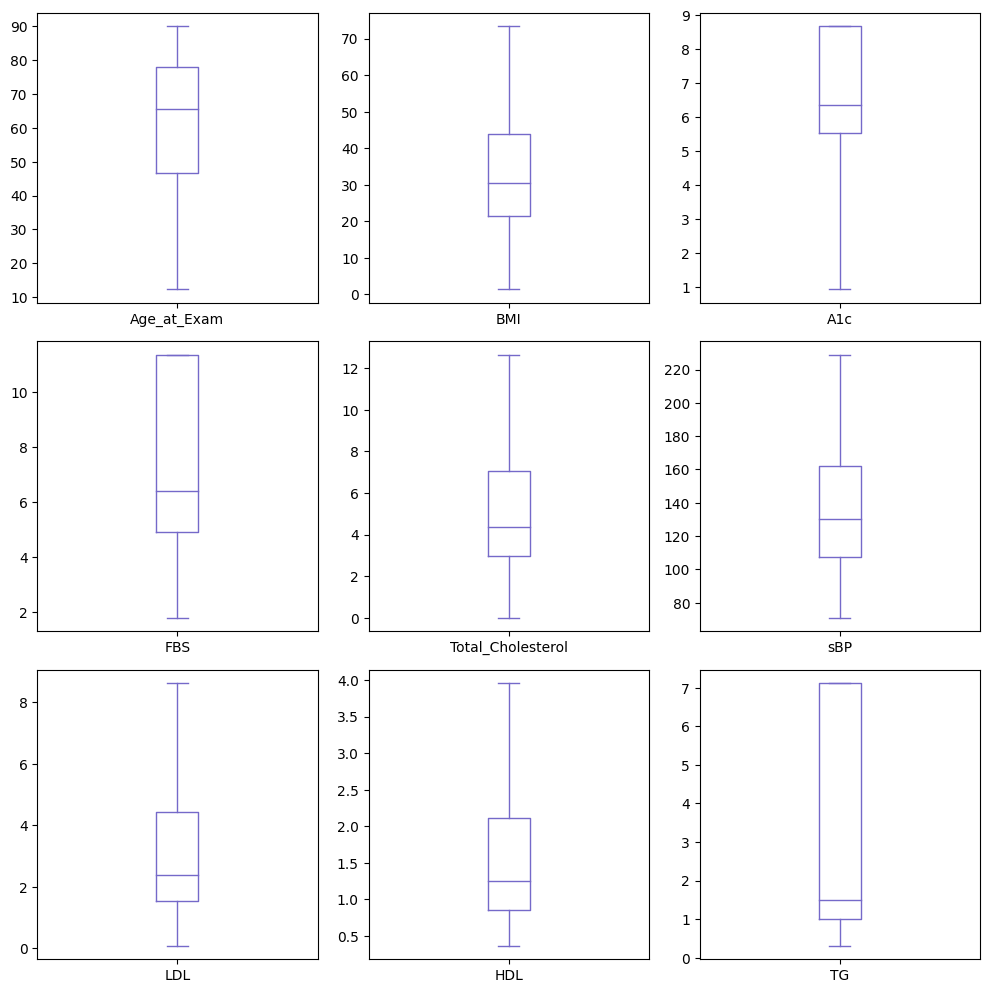

In [ ]:
# Specify the continuous variables to include
continuous_variables = ['Age_at_Exam', 'BMI', 'A1c', 'FBS', 'Total_Cholesterol', 'sBP', 'LDL', 'HDL', 'TG']

# Plot boxplots
description[continuous_variables].plot(kind='box', subplots=True, layout=(3, 3), figsize=(10, 10), color='#7569c9', sym='')
plt.tight_layout()
plt.show()


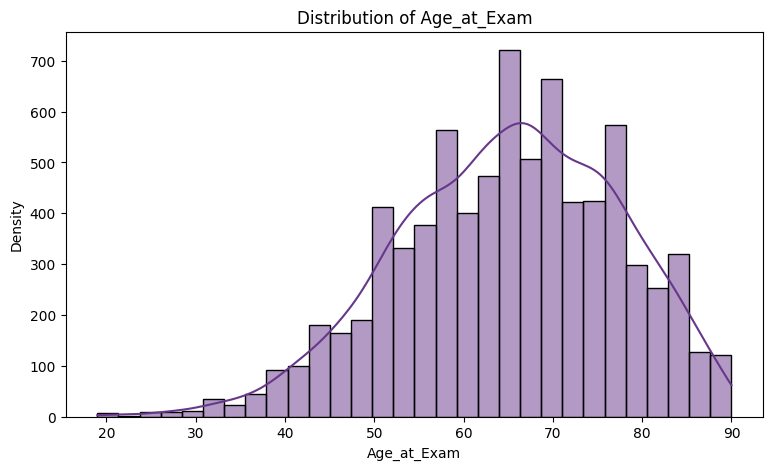

<Figure size 900x500 with 0 Axes>

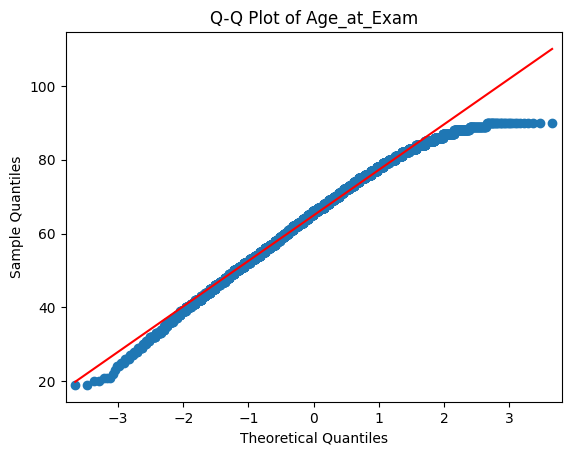

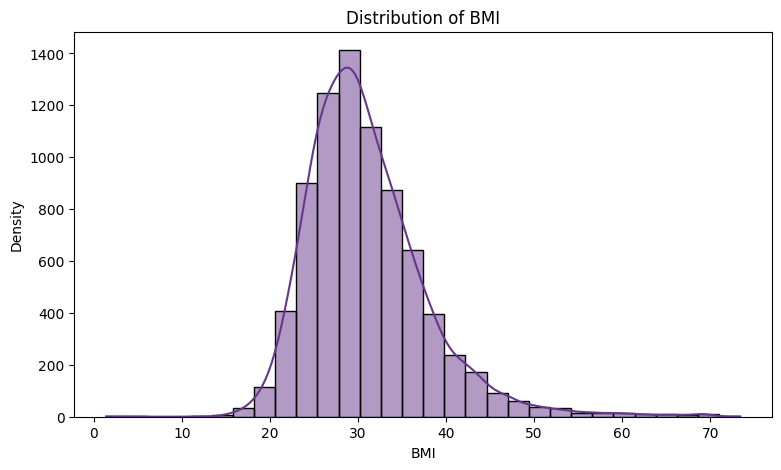

<Figure size 900x500 with 0 Axes>

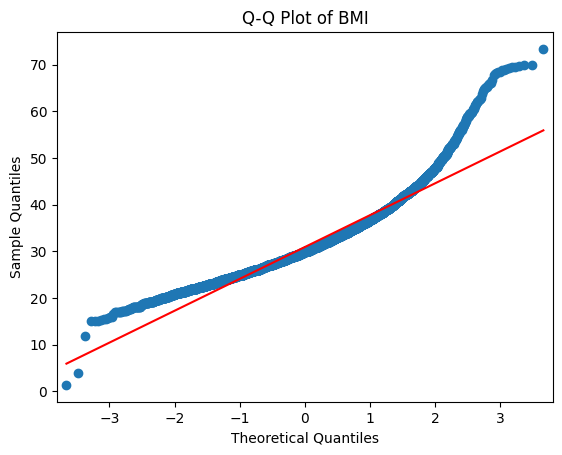

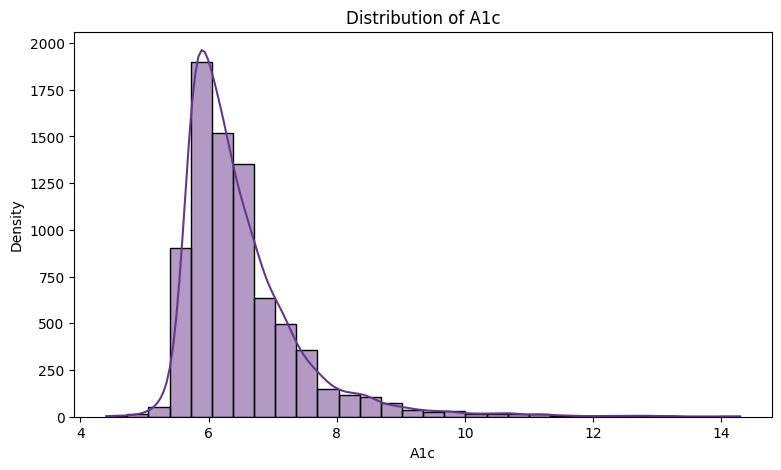

<Figure size 900x500 with 0 Axes>

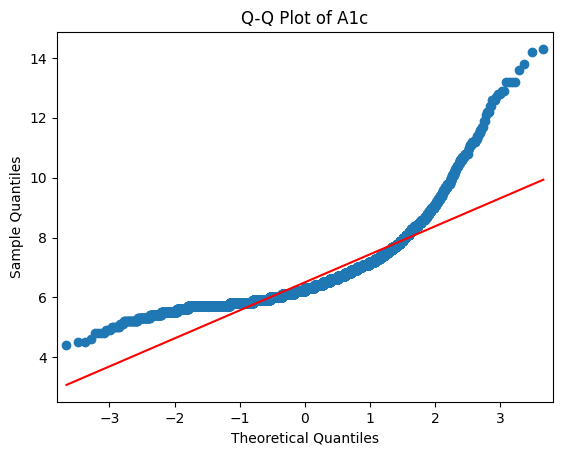

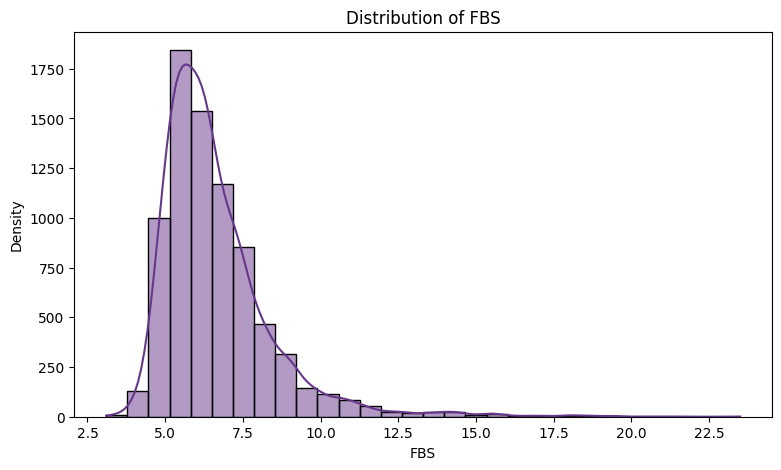

<Figure size 900x500 with 0 Axes>

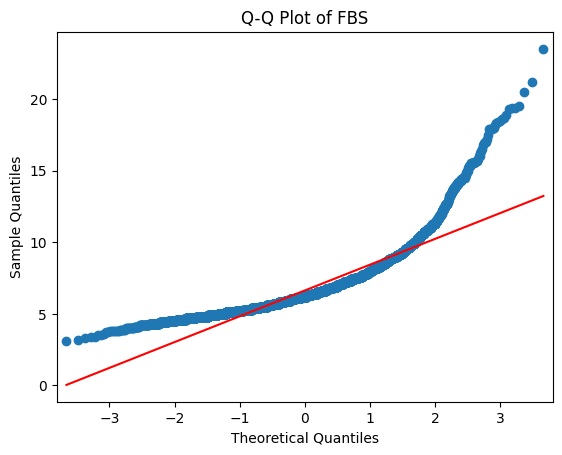

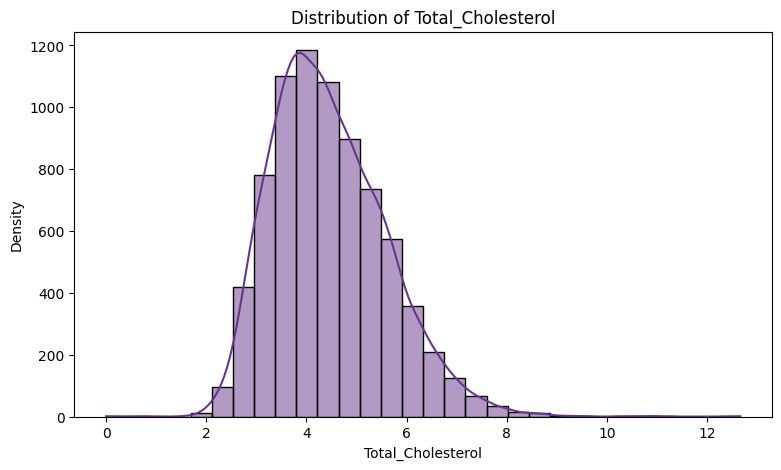

<Figure size 900x500 with 0 Axes>

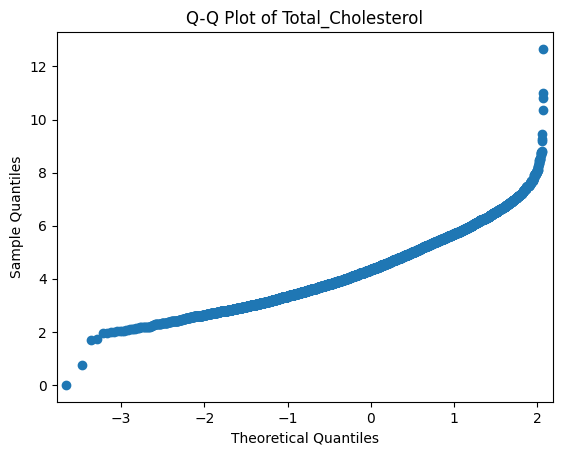

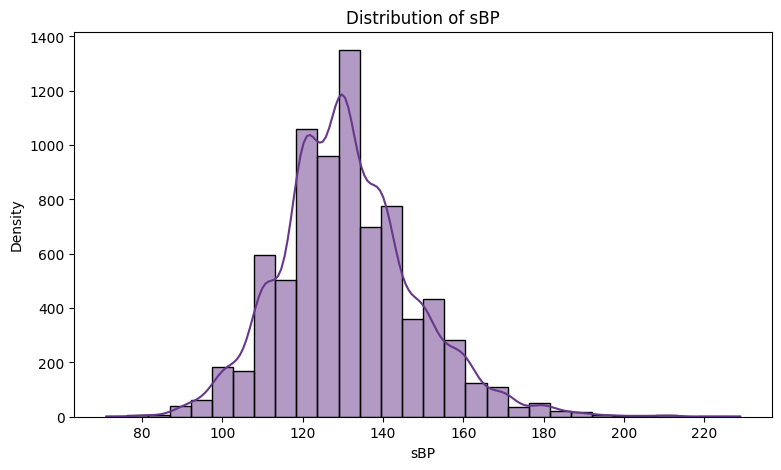

<Figure size 900x500 with 0 Axes>

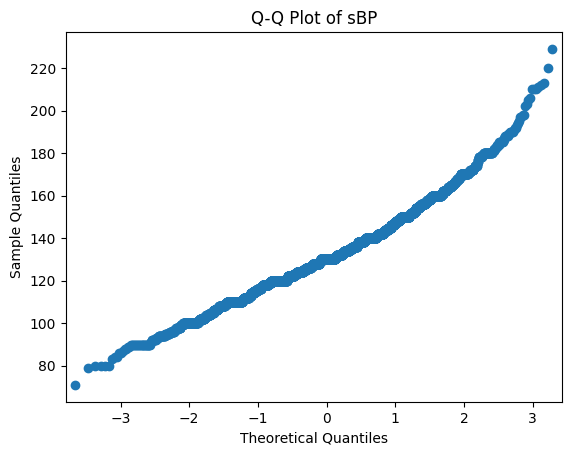

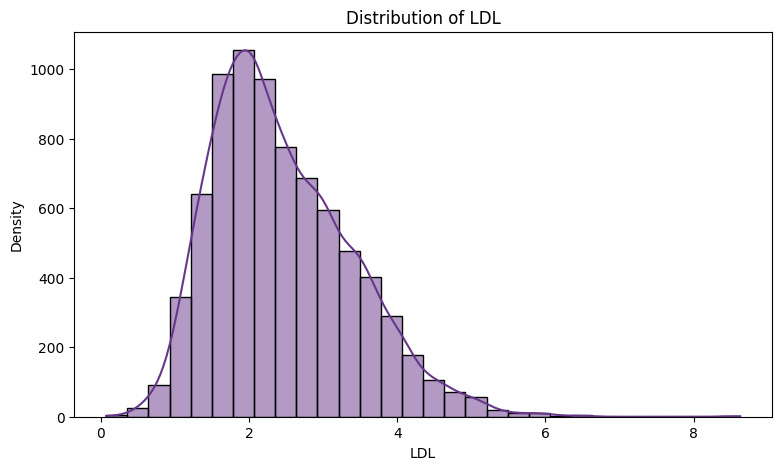

<Figure size 900x500 with 0 Axes>

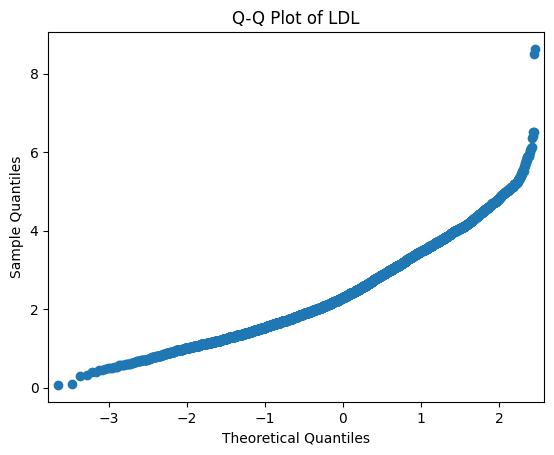

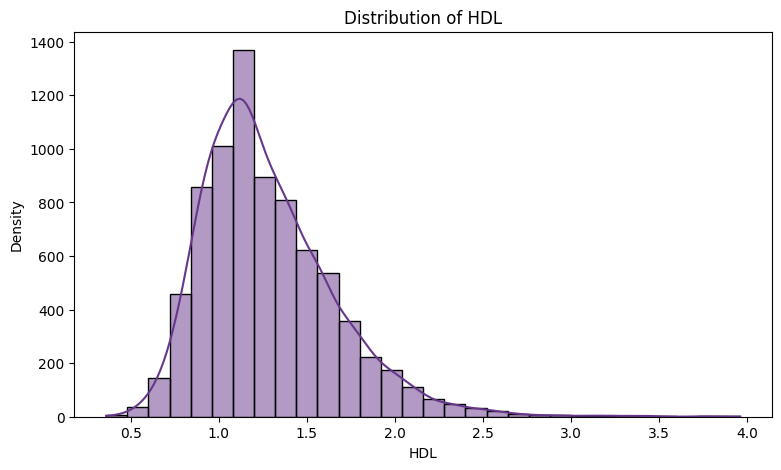

<Figure size 900x500 with 0 Axes>

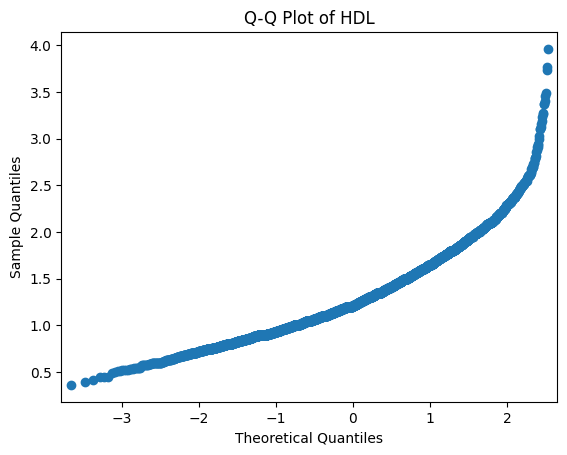

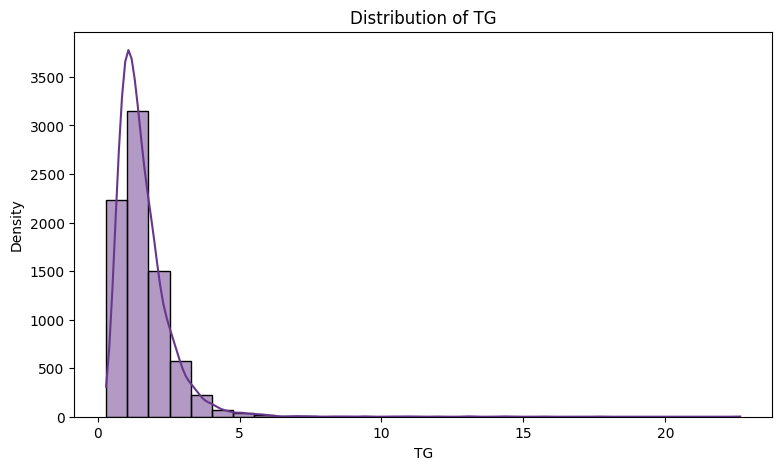

<Figure size 900x500 with 0 Axes>

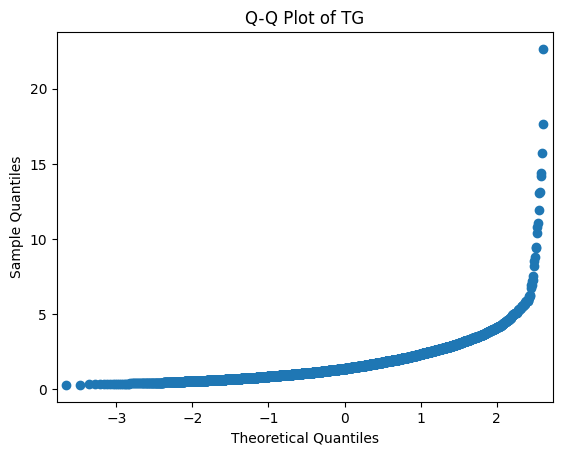

In [ ]:
for variable in continuous_variables:
    # Create a new figure for each variable
    plt.figure(figsize=(9, 5))

    # Histogram with a smoothed line (kernel density estimate)
    sns.histplot(data[variable], bins=30, kde=True, color='#66378a')
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Density')
    plt.show()

    # Q-Q plot
    plt.figure(figsize=(9, 5))
    sm.qqplot(data[variable], line='s', color='#66378a')
    plt.title(f'Q-Q Plot of {variable}')
    plt.show()

<Figure size 900x500 with 0 Axes>

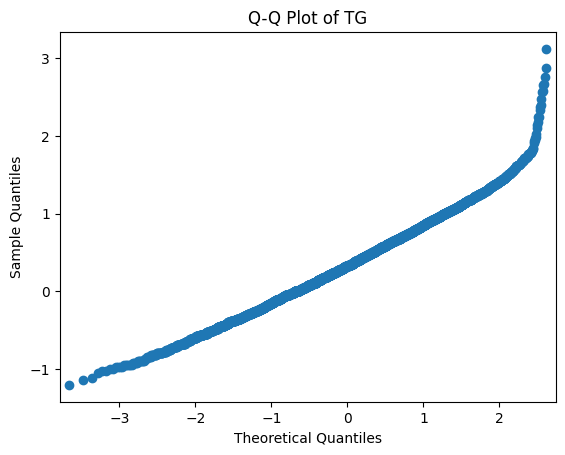

In [ ]:
continuous_log = ['TG']

data_norm = data  # Create a copy of the original data

# Re-express data as log, made loop in case we need to transofrom other vars in future
for var in continuous_log:
    data_norm[var] = np.log(data_norm[var])

##qq plots
for var in continuous_log:


    plt.figure(figsize=(9, 5))
    sm.qqplot(data_norm[var], line='s', color='#66378a')
    plt.title(f'Q-Q Plot of {var}')
    plt.show()

data_norm.head()

#link back to main data - SWITCH
data = data_norm

In [ ]:
#TEMPORARILY HIDE TO CODE RUNS FASTER WHEN SWITCHING USERS

# # Subset the data to include only the specified continuous variables
# pairwise_df = data[continuous_variables + ['Depression']]

# # Create a pairwise plot
# sns.pairplot(pairwise_df, hue='Depression', palette="magma")
# plt.show()

In [ ]:
# # Create a histogram for Age
# plt.figure(figsize=(9, 5))
# sns.histplot(data['Age_at_Exam'], bins=30, kde=False, color='#66378a')
# plt.title('Distribution of Age Among Patients')
# plt.xlabel('Age (Years)')
# plt.ylabel('Number of Patients')
# plt.show()

# # Q-Q plot
# plt.figure(figsize=(9, 5))
# sm.qqplot(data['Age_at_Exam'], line='s', color='#66378a')
# plt.title('Q-Q Plot of Age Distribution')
# plt.show()

# #both are ok

In [ ]:
# # Create a histogram for the 'BMI' feature
# plt.figure(figsize=(9, 5))
# sns.histplot(data['BMI'], bins=30, kde=False, color='#66378a')
# plt.title('Distribution of BMI Among Patients')
# plt.xlabel('BMI')
# plt.ylabel('Number of Patients')
# plt.show()

# # Create a Q-Q plot for the 'BMI' feature
# plt.figure(figsize=(9, 5))
# stats.probplot(data['BMI'], dist="norm", plot=plt)
# plt.title('Q-Q Plot for BMI')
# plt.show()

# #heavy right tail,

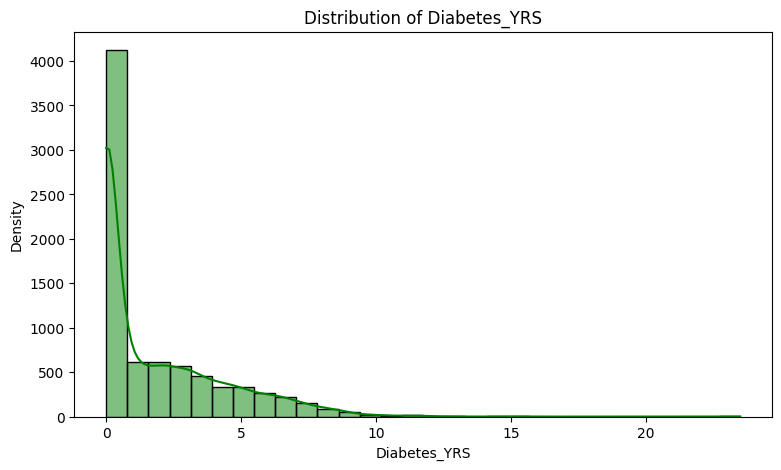

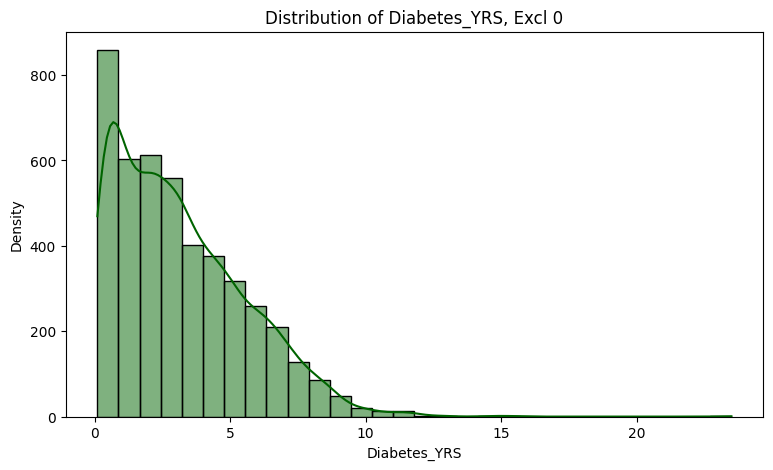

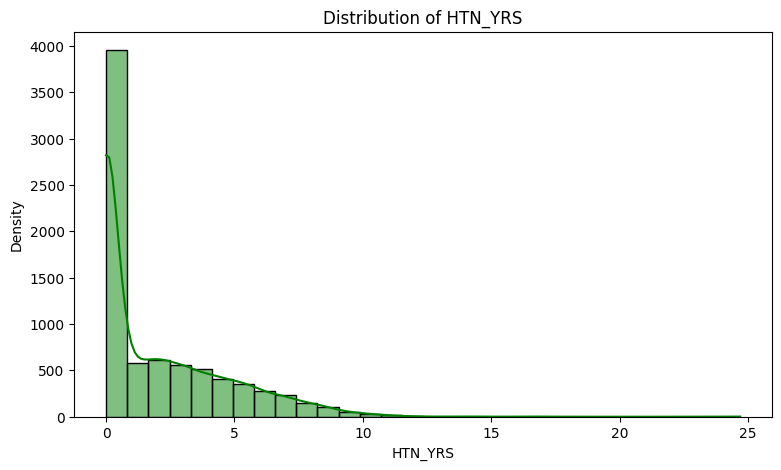

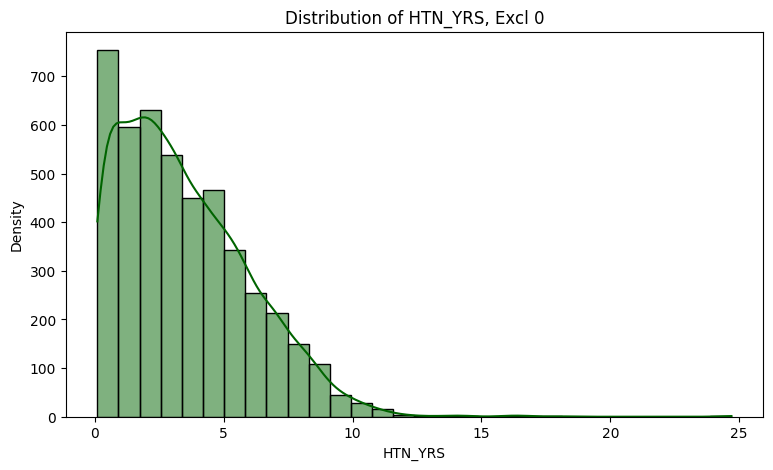

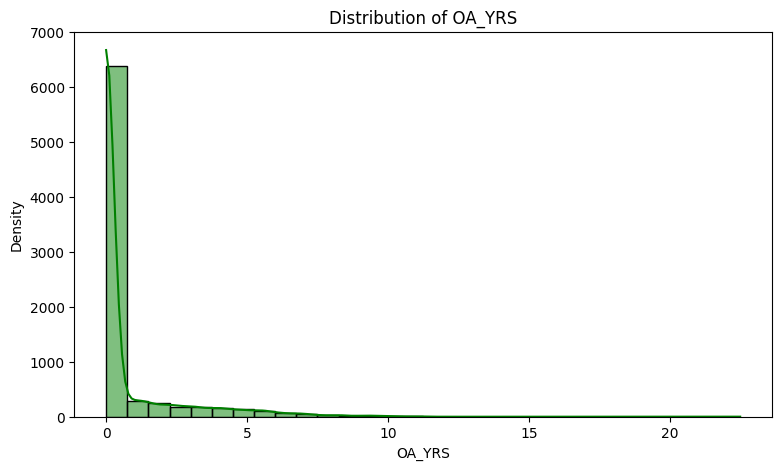

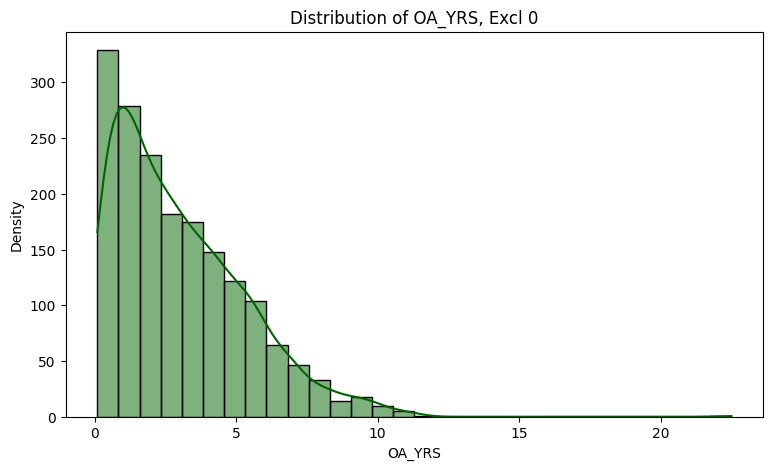

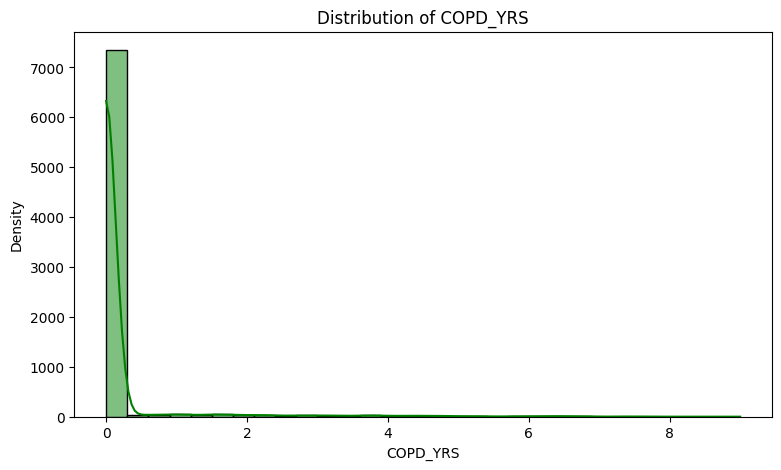

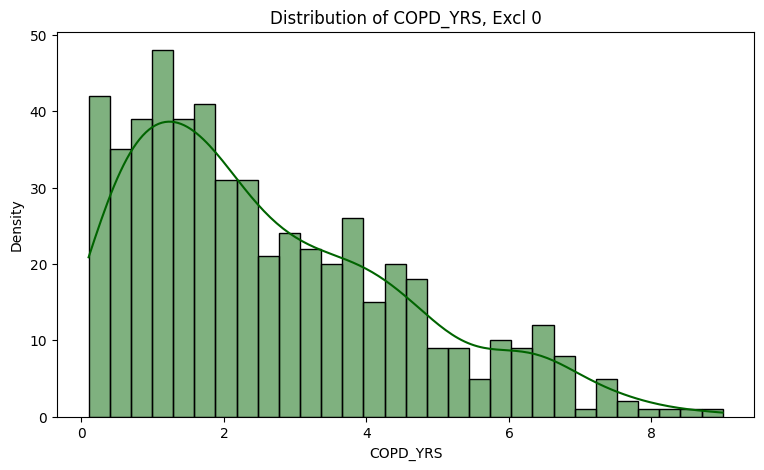

In [ ]:
conditiontime_variables = ["Diabetes_YRS", "HTN_YRS", "OA_YRS", "COPD_YRS"]


for variable in conditiontime_variables:
    # Create a new figure for each variable
    plt.figure(figsize=(9, 5))
    # Histogram with a smoothed line (kernel density estimate)
    sns.histplot(data[variable], bins=30, kde=True, color='green')
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Density')
    plt.show()

    # Create a new figure - without 0
    plt.figure(figsize=(9, 5))
    # Filter the data to exclude values equal to 0
    filtered_data = data[data[variable] > 0]
    # Histogram of the filtered data
    sns.histplot(filtered_data[variable], bins=30, kde=True, color='darkgreen')
    plt.title(f'Distribution of {variable}, Excl 0')
    plt.xlabel(variable)
    plt.ylabel('Density')
    plt.show()

In [ ]:
# # Create a histogram for the 'A1c' feature
# plt.figure(figsize=(9, 5))
# sns.histplot(data['A1c'], bins=30, kde=False, color='#66378a')
# plt.title('Distribution of A1c Among Patients')
# plt.xlabel('A1c')
# plt.ylabel('Number of Patients')
# plt.show()

In [ ]:
# # Create a histogram for the 'FBS' feature
# plt.figure(figsize=(9, 5))
# sns.histplot(data['FBS'], bins=30, kde=False, color='#66378a')
# plt.title('Distribution of Fasting Blood Surgar Level Among Patients')
# plt.xlabel('FBS')
# plt.ylabel('Number of Patients')
# plt.show()

In [ ]:
# # Create a histogram for the 'Total_Cholesteral' feature
# plt.figure(figsize=(9, 5))
# sns.histplot(data['Total_Cholesterol'], bins=30, kde=False, color='#66378a')
# plt.title('Distribution of Total Cholesterol Among Patients')
# plt.xlabel('Total Cholesterol')
# plt.ylabel('Number of Patients')
# plt.show()

# Categorical Variables

In [ ]:
### FREQUENCY AMONG CATEGORICAL VARIABLES

# Cat var
categorical = ["Diabetes", "Depression", "HTN", "OA", "COPD"]

# Def colours
colors = ['#1c3a73', '#7cb1c2']

# Overall - both sexes
yes, no = np.zeros(len(categorical)), np.zeros(len(categorical))

for c in categorical:
   yes[categorical.index(c)] = np.sum(data[c] == 1)
   no[categorical.index(c)] = np.sum(data[c] == 0)

fig = px.bar(x=categorical, y=[no, yes], labels={'x': 'Attribute', 'y': 'Number of Patients'},
             title="Categorical Comorbidity Variables - Overall", color_discrete_sequence=colors)
fig.update_layout(xaxis_title="Attribute", yaxis_title="Number of Patients")
fig.update_traces(marker_line_width=0)
fig.update_layout(height=400, width=600)
fig.show()

# By Diabetes
cat_no_diabetes = data.loc[data["Diabetes"] == 0]
cat_diabetes = data.loc[data["Diabetes"] == 1]

cat_no_diabetes_counts = cat_no_diabetes[categorical].apply(pd.value_counts).T
cat_diabetes_counts = cat_diabetes[categorical].apply(pd.value_counts).T

fig = px.bar(cat_no_diabetes_counts, barmode='stack', title="Categorical Variables by Diabetes Status: Pre-Diabetes", color_discrete_sequence=colors)
fig.update_layout(xaxis_title="Attribute", yaxis_title="Number of Patients")
fig.update_traces(marker_line_width=0)
fig.update_layout(height=400, width=600)
fig.show()

fig = px.bar(cat_diabetes_counts, barmode='stack', title="Categorical Variables by Diabetes Status: Diabetes", color_discrete_sequence=colors)
fig.update_layout(xaxis_title="Attribute", yaxis_title="Number of Patients")
fig.update_traces(marker_line_width=0)
fig.update_layout(height=400, width=600)
fig.show()

# By Depression
cat_no_depression = data.loc[data["Depression"] == 0]
cat_depression = data.loc[data["Depression"] == 1]

cat_no_depression_counts = cat_no_depression[categorical].apply(pd.value_counts).T
cat_depression_counts = cat_depression[categorical].apply(pd.value_counts).T

fig = px.bar(cat_no_depression_counts, barmode='stack', title="Categorical Variables by Depression Status: No Depression", color_discrete_sequence=colors)
fig.update_layout(xaxis_title="Attribute", yaxis_title="Number of Patients")
fig.update_traces(marker_line_width=0)
fig.update_layout(height=400, width=600)
fig.show()

fig = px.bar(cat_depression_counts, barmode='stack', title="Categorical Variables by Depression Status: Depression", color_discrete_sequence=colors)
fig.update_layout(xaxis_title="Attribute", yaxis_title="Number of Patients")
fig.update_traces(marker_line_width=0)
fig.update_layout(height=400, width=600)
fig.show()

#all have count at least 5


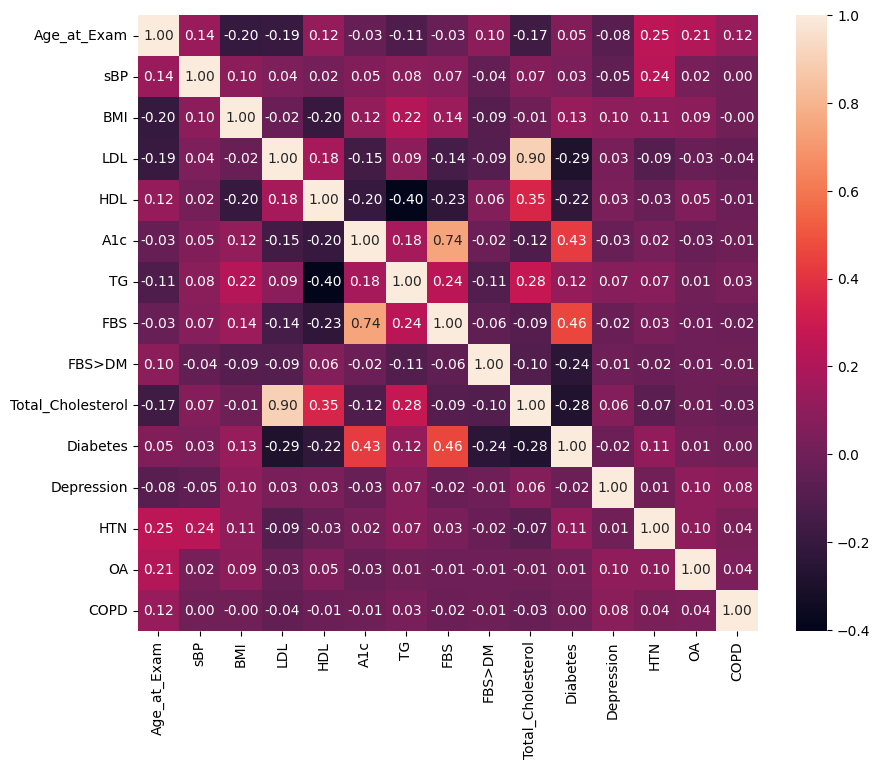

In [ ]:
# Exclude variables that start with 'HTRX_' or 'CSRX_', end with '_YRS', and 'Diabetes2'
filtered_data = data.loc[:, ~data.columns.str.startswith('HTRX_') & ~data.columns.str.startswith('CSRX_') & ~data.columns.str.endswith('_YRS') & (data.columns != 'Diabetes2')]

# Calculate the correlation matrix
corr_matrix = filtered_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

#LDL is correlated with cholesterol, A1c is correlated with Fasting Blood Sugar (FBS)
#we will pick *LDL over cholesterol as it appears to be more frequently collected in clinic (may reduce potential training-serving skew)
#Both A1C and FBS do not have missing data, so we will select *A1c vs FBS solely due to its utility as a marker of bloood sugar conrol in past 3 months

# Imputation? - Shouldnt this be done after data splitting?

In [ ]:
# # Define a function to preprocess and transform input data
# def fit_transform(input_df):
#     # Initialize transformers and imputers
#     imputer = IterativeImputer(max_iter=10, random_state=0)
#     st_x = StandardScaler()

#     # Create a copy of the input DataFrame to avoid modifying the original data
#     df = input_df.copy()

#     # Perform imputation and standardization on the feature matrix
#     X = imputer.fit_transform(df.drop('Diabetes', axis=1).to_numpy())
#     X = st_x.fit_transform(X)

#     # Extract the target variable 'Diabetes'
#     Y = df['Diabetes'].to_numpy()

#     # Return the preprocessed feature matrix, target variable, and transformers/imputers
#     return X, Y, imputer, st_x

In [ ]:
# # Define a function to transform new data using pre-trained transformers and imputers
# def transform(input_df, imputer, st_x):
#     # Create a copy of the input DataFrame to avoid modifying the original data
#     df = input_df.copy()

#     # Perform imputation and standardization on the feature matrix
#     X = imputer.transform(df.drop('Diabetes', axis=1).to_numpy())
#     X = st_x.transform(X)

#     # Return the transformed feature matrix
#     return X
# # Define a function to compute various scores for model evaluation
# def get_scores(Y_pred, Y):
#     # Calculate confusion matrix, classification report, ROC AUC, and accuracy
#     conf_matrix = confusion_matrix(Y_pred, Y)
#     class_report = classification_report(Y_pred, Y)
#     auc = roc_auc_score(Y_pred, Y)
#     acc = accuracy_score(Y_pred, Y)

#     # Return the computed scores
#     return conf_matrix, class_report, auc, acc

# # Define a function to print the computed scores
# def print_scores(conf_matrix, class_report, auc, acc):
#     print('AUC : ', auc)
#     print('Accuracy : ', acc)
#     print("Confusion Matrix:")
#     print(conf_matrix)
#     print("\nClassification Report:")
#     print(class_report)

In [ ]:
# data['Sex'].replace({'Female' : 1, 'Male' : 0}, inplace=True)

# # Splitting the dataset into training and test sets
# train = data.sample(frac=0.7, random_state=10)  # 70% for training
# test = data.drop(train.index)  # Remaining data for testing

# # Feature engineering and preprocessing on the training set
# X_train, Y_train, imputer, st_x = fit_transform(train)

# # Preprocess and transform the test set
# X_test = transform(test, imputer, st_x)
# Y_test = test['Diabetes'].to_numpy()

# # Initialize and train a logistic regression model
# model = LogisticRegression()
# model.fit(X_train, Y_train)

# # Make predictions on the test and training sets
# y_pred_test = model.predict(X_test)
# y_pred_train = model.predict(X_train)

# # Calculate evaluation metrics and scores for the test and training sets
# conf_matrix_test, class_report_test, auc_test, acc_test = get_scores(y_pred_test, Y_test)
# conf_matrix_train, class_report_train, auc_train, acc_train = get_scores(y_pred_train, Y_train)

# # Print scores and evaluation metrics for the training set
# print('======== Training Set ==========')
# print_scores(conf_matrix_train, class_report_train, auc_train, acc_train)

# # Print scores and evaluation metrics for the test set
# print('======== Test Set ==========')
# print_scores(conf_matrix_test, class_report_test, auc_test, acc_test)

# # Plot the ROC curve for the training set
# fpr, tpr, thresholds = roc_curve(y_pred_train, Y_train)
# roc_auc = auc(fpr, tpr)
# display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
# display.plot()

# K-MEANS CLUSTERING WITH LOGISTIC REGRESSION

Cluster medication profiles for HTN and Corticosteroids - All Patients

In [ ]:
# from sklearn.metrics import pairwise_distances
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans

# htrx_csrx_variables = [col for col in data.columns if col.startswith('HTRX') or col.startswith('CSRX')]

# print(htrx_csrx_variables)
# print(len(htrx_csrx_variables))

# binary_data = data[htrx_csrx_variables].to_numpy()

# # Calculate the Hamming distance matrix
# hamming_distance = pairwise_distances(binary_data, metric='hamming')

# # Elbow method to determine the optimal number of clusters (K)
# distortions = []
# K_range = range(1, 30)  # grid search
# for k in K_range:
#     kmeans = KMeans(n_clusters=k, random_state=0)
#     kmeans.fit(hamming_distance)
#     distortions.append(kmeans.inertia_)

# # Plot the elbow plot to visualize the optimal K
# plt.figure(figsize=(8, 6))
# plt.plot(K_range, distortions, marker='o')
# plt.title('Elbow Method for Optimal K')
# plt.xlabel('Number of Clusters (K)')
# plt.ylabel('Distortion')
# plt.grid(True)
# plt.show()


['HTRX_ACEBUTOLOL', 'HTRX_ALISKIREN', 'HTRX_AMLODIPINE', 'HTRX_ATENOLOL', 'HTRX_BENAZEPRIL', 'HTRX_BISOPROLOL', 'HTRX_CANDESARTAN', 'HTRX_CARVEDILOL', 'HTRX_CILAZAPRIL', 'HTRX_DILTIAZEM', 'HTRX_DIURETIC', 'HTRX_DOXAZOSIN', 'HTRX_ENALAPRIL', 'HTRX_EPROSARTAN', 'HTRX_FELODIPINE', 'HTRX_FOSINOPRIL', 'HTRX_FUROSEMIDE', 'HTRX_HYDROCHLOROTHIAZIDE', 'HTRX_IRBESARTAN', 'HTRX_LABETALOL', 'HTRX_LISINOPRIL', 'HTRX_LOSARTAN', 'HTRX_METOPROLOL', 'HTRX_NADOLOL', 'HTRX_NIFEDIPINE', 'HTRX_OLMESARTAN MEDOXOMIL', 'HTRX_PERINDOPRIL', 'HTRX_POTASSIUM-SPARING AGENTS', 'HTRX_PROPRANOLOL', 'HTRX_QUINAPRIL', 'HTRX_RAMIPRIL', 'HTRX_SOTALOL', 'HTRX_SPIRONOLACTONE', 'HTRX_TELMISARTAN', 'HTRX_TIMOLOL', 'HTRX_TRANDOLAPRIL', 'HTRX_VALSARTAN', 'HTRX_VERAPAMIL', 'CSRX_ANTIBIOTICS', 'CSRX_ANTIINFECTIVES', 'CSRX_DEXAMETHASONE', 'CSRX_HYDROCORTISONE', 'CSRX_METHYLPREDNISOLONE', 'CSRX_PREDNISOLONE', 'CSRX_PREDNISONE']
45


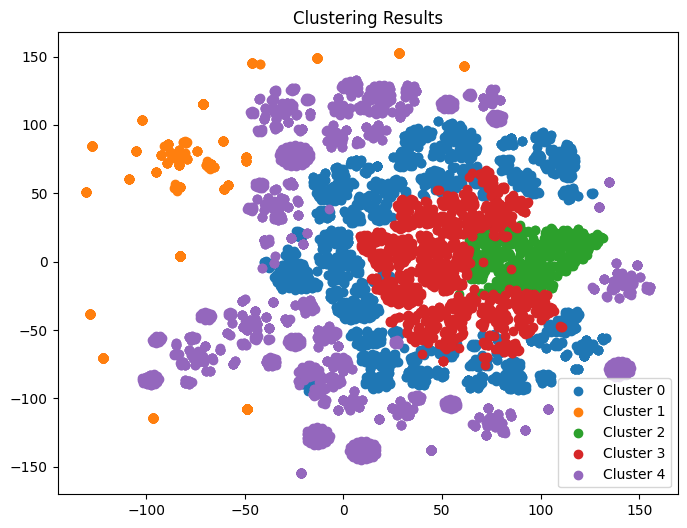

In [ ]:
from sklearn.metrics import pairwise_distances
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

htrx_csrx_variables = [col for col in data.columns if col.startswith('HTRX') or col.startswith('CSRX')]

print(htrx_csrx_variables)
print(len(htrx_csrx_variables))

binary_data = data[htrx_csrx_variables].to_numpy()

# Calculate the Hamming distance matrix
hamming_distance = pairwise_distances(binary_data, metric='hamming')

# Apply K-Means clustering with K=5
kmeans = KMeans(n_clusters=5, random_state=0)
labels = kmeans.fit_predict(hamming_distance)

# Visualize the clustering results using a scatter plot (you may choose a suitable projection technique)
# Example: Using t-SNE for visualization (you need to import it)
from sklearn.manifold import TSNE

# Reduce dimensionality for visualization (adjust the number of components as needed)
tsne = TSNE(n_components=2, random_state=0)
projected_data = tsne.fit_transform(hamming_distance)

# Plot the clusters
plt.figure(figsize=(8, 6))
for i in range(5):
    plt.scatter(projected_data[labels == i, 0], projected_data[labels == i, 1], label=f'Cluster {i}')
plt.title('Clustering Results')
plt.legend()
plt.show()

In [ ]:
data['Med_Cluster'] = labels
data.head(10)

,Age_at_Exam,sBP,BMI,LDL,HDL,A1c,TG,FBS,FBS>DM,Total_Cholesterol,Diabetes,Depression,HTN,OA,COPD,Sex,Diabetes2,HTRX_ACEBUTOLOL,HTRX_ALISKIREN,HTRX_AMLODIPINE,HTRX_ATENOLOL,HTRX_BENAZEPRIL,HTRX_BISOPROLOL,HTRX_CANDESARTAN,HTRX_CARVEDILOL,HTRX_CILAZAPRIL,HTRX_DILTIAZEM,HTRX_DIURETIC,HTRX_DOXAZOSIN,HTRX_ENALAPRIL,HTRX_EPROSARTAN,HTRX_FELODIPINE,HTRX_FOSINOPRIL,HTRX_FUROSEMIDE,HTRX_HYDROCHLOROTHIAZIDE,HTRX_IRBESARTAN,HTRX_LABETALOL,HTRX_LISINOPRIL,HTRX_LOSARTAN,HTRX_METOPROLOL,HTRX_NADOLOL,HTRX_NIFEDIPINE,HTRX_OLMESARTAN MEDOXOMIL,HTRX_PERINDOPRIL,HTRX_POTASSIUM-SPARING AGENTS,HTRX_PROPRANOLOL,HTRX_QUINAPRIL,HTRX_RAMIPRIL,HTRX_SOTALOL,HTRX_SPIRONOLACTONE,HTRX_TELMISARTAN,HTRX_TIMOLOL,HTRX_TRANDOLAPRIL,HTRX_VALSARTAN,HTRX_VERAPAMIL,CSRX_ANTIBIOTICS,CSRX_ANTIINFECTIVES,CSRX_DEXAMETHASONE,CSRX_HYDROCORTISONE,CSRX_METHYLPREDNISOLONE,CSRX_PREDNISOLONE,CSRX_PREDNISONE,OBS_DATE,Diabetes_YRS,HTN_YRS,OA_YRS,COPD_YRS,Med_Cluster
2138,75,154.0,27.000000,2.35,1.59,5.7,0.270027,5.0,1,4.54,0,0,1,1,0,Female,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2013-06-18,0.0,4.0,4.0,0.0,0
2139,46,110.0,21.000000,2.56,1.35,5.7,-0.116534,4.8,1,4.31,0,1,0,0,1,Female,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015-02-06,0.0,0.0,0.0,4.2,1
2140,57,110.0,27.475629,4.20,2.55,5.7,-0.342490,4.2,1,7.07,0,0,1,1,0,Female,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2013-07-31,0.0,2.2,2.2,0.0,4
2141,44,110.0,35.000000,3.72,1.15,5.7,0.048790,4.7,1,5.35,0,0,0,0,0,Male,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2013-07-12,0.0,0.0,0.0,0.0,1
2142,45,116.0,29.000000,3.66,1.56,5.7,-0.210721,5.1,1,NaN,0,0,1,0,0,Female,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012-10-01,0.0,2.4,0.0,0.0,4
2143,71,118.0,23.000000,2.96,1.48,5.7,-0.400478,5.1,1,4.74,0,1,1,1,0,Male,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2014-01-14,0.0,1.5,0.0,0.0,0
2144,67,130.0,30.000000,2.70,1.00,5.7,0.122218,4.6,1,4.21,0,0,1,1,0,Male,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2013-04-29,0.0,0.2,0.8,0.0,1
2145,30,118.0,37.000000,2.38,1.30,5.7,0.625938,5.9,1,4.53,0,1,0,0,0,Female,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014-02-04,0.0,0.0,0.0,0.0,1
2146,56,124.0,26.000000,3.06,2.35,5.7,-0.544727,4.9,1,5.67,0,1,1,0,0,Female,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,2012-05-16,0.0,3.4,0.0,0.0,4
2147,66,160.0,22.000000,3.70,2.17,5.7,-0.105361,5.6,1,6.28,0,0,0,0,0,Female,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010-07-12,0.0,0.0,0.0,0.0,1


Cluster medication profiles for HTN ONLY, AMONG HT PATIENTS ONLY, (EXCLUDED FROM ANALYSIS)

In [ ]:
# from sklearn.metrics import pairwise_distances
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans

# # Define the 'HTRX' variables
# htrx_variables = [col for col in data.columns if col.startswith('HTRX')]
# print(htrx_variables)
# print(len(htrx_variables))

# # Create a subset of the data where 'HTN' is equal to 1
# subset_data = data[data['HTN'] == 1]

# # Extract the 'HTRX' binary data from the subset
# binary_data = subset_data[htrx_variables].to_numpy()

# # Calculate the Hamming distance matrix
# hamming_distance = pairwise_distances(binary_data, metric='hamming')

# # Elbow method to determine the optimal number of clusters (K)
# distortions = []
# K_range = range(1, 19)  # Grid search for K
# for k in K_range:
#     kmeans = KMeans(n_clusters=k, random_state=0)
#     kmeans.fit(hamming_distance)
#     distortions.append(kmeans.inertia_)

# # Plot the elbow plot to visualize the optimal K
# plt.figure(figsize=(8, 6))
# plt.plot(K_range, distortions, marker='o')
# plt.title('Elbow Method for Optimal K (Subset with HTN=1)')
# plt.xlabel('Number of Clusters (K)')
# plt.ylabel('Distortion')
# plt.grid(True)
# plt.show()

In [ ]:
# # Apply K-Means clustering with K=5
# kmeans = KMeans(n_clusters=5, random_state=0)
# labels = kmeans.fit_predict(hamming_distance)

# # Reduce dimensionality for visualization using t-SNE
# tsne = TSNE(n_components=2, random_state=0)
# projected_data = tsne.fit_transform(hamming_distance)

# # Plot the clusters
# plt.figure(figsize=(8, 6))
# for i in range(5):
#     plt.scatter(projected_data[labels == i, 0], projected_data[labels == i, 1], label=f'Cluster {i}')
# plt.title('Clustering Results (Subset with HTN=1)')
# plt.legend()
# plt.show()

# Logistic Regression

In [ ]:
data_lg = data

In [ ]:
#subset data
data_lg1 = data_lg[['Age_at_Exam', 'sBP', 'BMI', 'LDL', 'HDL', 'A1c', 'Diabetes', 'Depression', 'HTN', 'OA', 'COPD', 'Sex', 'Med_Cluster']]

data_lg1 = pd.get_dummies(data_lg1, columns=['Med_Cluster'], prefix='Med_Cluster')

#convert sex back to binary
sex_mapping = {"Female": 0, "Male": 1}
data_lg1["Sex"] = data_lg1["Sex"].map(sex_mapping)

data_lg1.head(10)

,Age_at_Exam,sBP,BMI,LDL,HDL,A1c,Diabetes,Depression,HTN,OA,COPD,Sex,Med_Cluster_0,Med_Cluster_1,Med_Cluster_2,Med_Cluster_3,Med_Cluster_4
2138,75,154.0,27.000000,2.35,1.59,5.7,0,0,1,1,0,0,1,0,0,0,0
2139,46,110.0,21.000000,2.56,1.35,5.7,0,1,0,0,1,0,0,1,0,0,0
2140,57,110.0,27.475629,4.20,2.55,5.7,0,0,1,1,0,0,0,0,0,0,1
2141,44,110.0,35.000000,3.72,1.15,5.7,0,0,0,0,0,1,0,1,0,0,0
2142,45,116.0,29.000000,3.66,1.56,5.7,0,0,1,0,0,0,0,0,0,0,1
2143,71,118.0,23.000000,2.96,1.48,5.7,0,1,1,1,0,1,1,0,0,0,0
2144,67,130.0,30.000000,2.70,1.00,5.7,0,0,1,1,0,1,0,1,0,0,0
2145,30,118.0,37.000000,2.38,1.30,5.7,0,1,0,0,0,0,0,1,0,0,0
2146,56,124.0,26.000000,3.06,2.35,5.7,0,1,1,0,0,0,0,0,0,0,1
2147,66,160.0,22.000000,3.70,2.17,5.7,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
#doubl check data types
data_lg1.dtypes

Age_at_Exam        int64
sBP              float64
BMI              float64
LDL              float64
HDL              float64
A1c              float64
Diabetes           int64
Depression         int64
HTN                int64
OA                 int64
COPD               int64
Sex                int64
Med_Cluster_0      uint8
Med_Cluster_1      uint8
Med_Cluster_2      uint8
Med_Cluster_3      uint8
Med_Cluster_4      uint8
dtype: object

In [ ]:
#Model the data and select the value of lambda that maximizes discrimination
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split the data into features and target variable: DEATH_EVENT
X = data_lg1.drop('Depression', axis=1)
y = data_lg1['Depression']

# ==========================================================

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)



In [ ]:
# Check for missing values in the training set
missing_values_train = X_train.isnull().sum()

# Check for missing values in the test set
missing_values_test = X_test.isnull().sum()

print("Missing values in the training set:")
print(missing_values_train)

print("Missing values in the test set:")
print(missing_values_test)

Missing values in the training set:
Age_at_Exam       0
sBP               2
BMI               0
LDL              45
HDL              34
A1c               0
Diabetes          0
HTN               0
OA                0
COPD              0
Sex               0
Med_Cluster_0     0
Med_Cluster_1     0
Med_Cluster_2     0
Med_Cluster_3     0
Med_Cluster_4     0
dtype: int64
Missing values in the test set:
Age_at_Exam       0
sBP               1
BMI               0
LDL               9
HDL              10
A1c               0
Diabetes          0
HTN               0
OA                0
COPD              0
Sex               0
Med_Cluster_0     0
Med_Cluster_1     0
Med_Cluster_2     0
Med_Cluster_3     0
Med_Cluster_4     0
dtype: int64


In [ ]:
#impute and normalize

# Create an instance of the IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit and transform the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data
X_test_imputed = imputer.transform(X_test)

# Update the imputed values in the training and test sets
X_train = X_train_imputed
X_test = X_test_imputed

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

Best alpha for L1 penalty: (0.618965818891261, 0.20829949469889525)
Best alpha for L2 penalty: (0.31622776601683794, 0.20814051218697155)


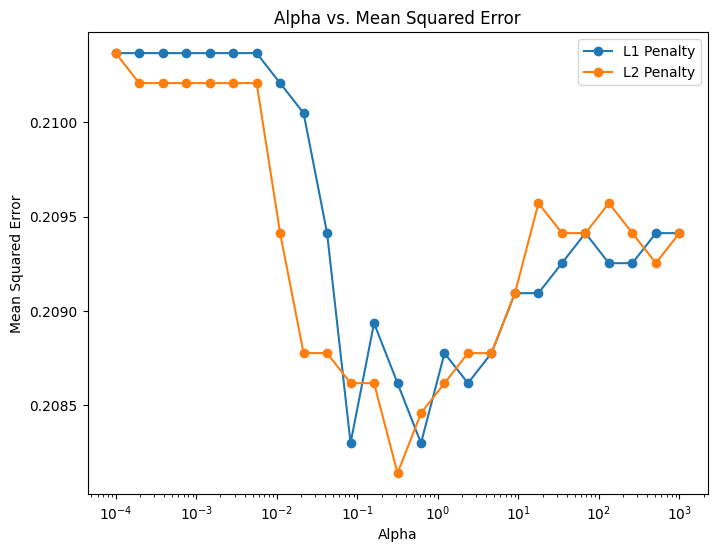

In [ ]:
#GRID SEARCH FOR BEST REGULARIZATION
from sklearn.model_selection import cross_val_score

np.random.seed(78)

alpha_min = 0.0001
alpha_max = 1000
num_alphas = 25  # The number of alpha vals

# Generate the alpha values using np.logspace
alphas = np.logspace(np.log10(alpha_min), np.log10(alpha_max), num_alphas)

# Lists to store mean MSE scores for L1 and L2
mean_mse_scores_l1 = []
mean_mse_scores_l2 = []

for alpha in alphas:
    # L1 penalty
    log_reg_l1 = LogisticRegression(penalty='l1', C=alpha, solver='liblinear')
    mse_scores_l1 = -cross_val_score(log_reg_l1, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    mean_mse_l1 = np.mean(mse_scores_l1)
    mean_mse_scores_l1.append((alpha, mean_mse_l1))

    # L2 penalty
    log_reg_l2 = LogisticRegression(penalty='l2', C=alpha, solver='liblinear')
    mse_scores_l2 = -cross_val_score(log_reg_l2, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    mean_mse_l2 = np.mean(mse_scores_l2)
    mean_mse_scores_l2.append((alpha, mean_mse_l2))

# Find the best alpha values for both L1 and L2
best_alpha_l1 = min(mean_mse_scores_l1, key=lambda x: x[1])
best_alpha_l2 = min(mean_mse_scores_l2, key=lambda x: x[1])

print('Best alpha for L1 penalty:', best_alpha_l1)
print('Best alpha for L2 penalty:', best_alpha_l2)

# Plot resultt
alphas_l1, mse_values_l1 = zip(*mean_mse_scores_l1)
alphas_l2, mse_values_l2 = zip(*mean_mse_scores_l2)

plt.figure(figsize=(8, 6))
plt.semilogx(alphas_l1, mse_values_l1, marker='o', linestyle='-', label='L1 Penalty')
plt.semilogx(alphas_l2, mse_values_l2, marker='o', linestyle='-', label='L2 Penalty')
plt.title('Alpha vs. Mean Squared Error')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [ ]:

# Training logistic regression model
#we used the ridge regression method
log_reg = LogisticRegression(penalty='l2', C=0.316, solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.316, solver='liblinear')

Confusion Matrix:
[[971 305]
 [151 146]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1276
           1       0.32      0.49      0.39       297

    accuracy                           0.71      1573
   macro avg       0.59      0.63      0.60      1573
weighted avg       0.76      0.71      0.73      1573



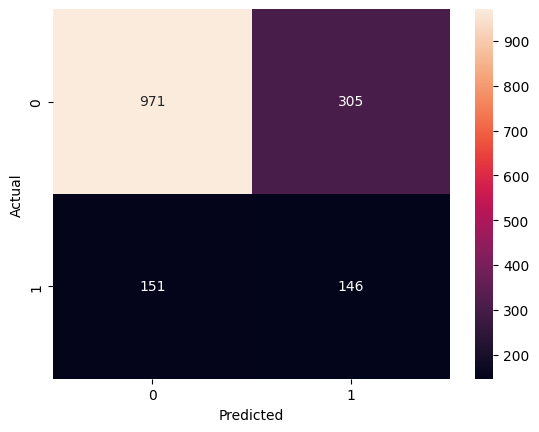

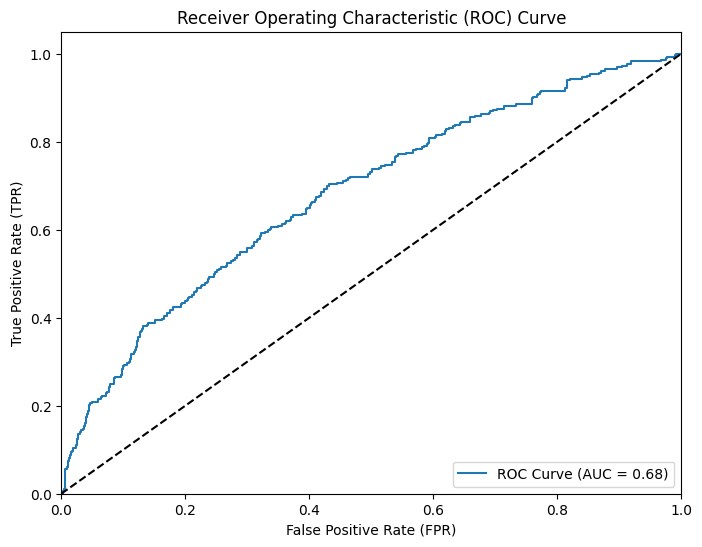

In [ ]:
# Part 1: Predictive Ability
from sklearn.metrics import roc_curve, roc_auc_score

# Use the model to make predictions on the testing data
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]  # probability of 1 (outcome)

# Apply the new threshold
threshold = 0.25
y_pred = (y_pred_proba >= threshold).astype(int)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Visualizing ROC at the new probability threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


create another model where medication combinations are one hot encoded - to be created later

In [ ]:
# # Filter columns that start with 'HTRX_' and 'CSRX_'
# columns_to_combine = [col for col in data_lg.columns if col.startswith('HTRX_') or col.startswith('CSRX_')]

# # Apply the concatenation function to each row to create the new variable
# data_lg['Combined_Medicines'] = data_lg[columns_to_combine].astype(str).apply(''.join, axis=1)

# data_lg.head()

# unique_counts = data_lg['Combined_Medicines'].value_counts()

# # Find the number of unique values
# num_unique_values = len(unique_counts)
# print(f"Number of Unique Values: {num_unique_values}")
# print(unique_counts)

# #subset data

# # data_lg = data_lg
# # data_lg1 = data_lg[['Age_at_Exam', 'sBP', 'BMI', 'LDL', 'HDL', 'A1c', 'Diabetes', 'Depression', 'HTN', 'OA', 'COPD', 'Sex', 'Med_Cluster']]

# # data_lg1 = pd.get_dummies(data_lg1, columns=['Med_Cluster'], prefix='Med_Cluster')

# # #convert sex back to binary
# # sex_mapping = {"Female": 0, "Male": 1}
# # data_lg1["Sex"] = data_lg1["Sex"].map(sex_mapping)

# # data_lg1.head(10)

# RANDOM FOREST SECTION

In [ ]:
!pip install category_encoders

import pandas as pd
import numpy as np
import warnings
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, auc, roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score
import plotly.express as px
from category_encoders import OneHotEncoder, TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')

In [ ]:
# Define a custom mapping function for the 'Sex' column
def map_sex_to_binary(value):
    if value == 'Female':
        return 1
    elif value == 'Male':
        return 0
    else:
        return value

# Apply the custom mapping function to the 'Sex' column
data['Sex'] = data['Sex'].apply(map_sex_to_binary)
data.head()




# Define the column that will be used as the binary target for modeling or analysis
target_column = 'Depression'


# List of categorical columns
binary_categorical_columns = ['HTN', 'OA', 'COPD']

# List of continuous columns
continuous_columns = ['Age_at_Exam', 'sBP', 'BMI', 'LDL', 'HDL', 'A1c', 'TG', 'FBS', 'Total_Cholesterol']



 #check if depression is transformed to numerical
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7862 entries, 0 to 9998
Data columns (total 68 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Age_at_Exam                    7862 non-null   int64   
 1   sBP                            7859 non-null   float64 
 2   BMI                            7862 non-null   float64 
 3   LDL                            7808 non-null   float64 
 4   HDL                            7818 non-null   float64 
 5   A1c                            7862 non-null   float64 
 6   TG                             7828 non-null   float64 
 7   FBS                            7862 non-null   float64 
 8   FBS>DM                         7862 non-null   int64   
 9   Total_Cholesterol              7713 non-null   float64 
 10  Diabetes                       7862 non-null   int64   
 11  Depression                     7862 non-null   category
 12  HTN                            786

In [ ]:
data.head()

,Age_at_Exam,sBP,BMI,LDL,HDL,A1c,TG,FBS,FBS>DM,Total_Cholesterol,Diabetes,Depression,HTN,OA,COPD,Sex,Diabetes2,HTRX_ACEBUTOLOL,HTRX_ALISKIREN,HTRX_AMLODIPINE,HTRX_ATENOLOL,HTRX_BENAZEPRIL,HTRX_BISOPROLOL,HTRX_CANDESARTAN,HTRX_CARVEDILOL,HTRX_CILAZAPRIL,HTRX_DILTIAZEM,HTRX_DIURETIC,HTRX_DOXAZOSIN,HTRX_ENALAPRIL,HTRX_EPROSARTAN,HTRX_FELODIPINE,HTRX_FOSINOPRIL,HTRX_FUROSEMIDE,HTRX_HYDROCHLOROTHIAZIDE,HTRX_IRBESARTAN,HTRX_LABETALOL,HTRX_LISINOPRIL,HTRX_LOSARTAN,HTRX_METOPROLOL,HTRX_NADOLOL,HTRX_NIFEDIPINE,HTRX_OLMESARTAN MEDOXOMIL,HTRX_PERINDOPRIL,HTRX_POTASSIUM-SPARING AGENTS,HTRX_PROPRANOLOL,HTRX_QUINAPRIL,HTRX_RAMIPRIL,HTRX_SOTALOL,HTRX_SPIRONOLACTONE,HTRX_TELMISARTAN,HTRX_TIMOLOL,HTRX_TRANDOLAPRIL,HTRX_VALSARTAN,HTRX_VERAPAMIL,CSRX_ANTIBIOTICS,CSRX_ANTIINFECTIVES,CSRX_DEXAMETHASONE,CSRX_HYDROCORTISONE,CSRX_METHYLPREDNISOLONE,CSRX_PREDNISOLONE,CSRX_PREDNISONE,Diabetes_YRS,HTN_YRS,OA_YRS,COPD_YRS,Med_Cluster,Combined_Medicines
0,54,135.0,39.000000,2.85,1.10,8.3,0.792993,7.0,1,4.95,1,0,1,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.2,0.0,0.0,0.0,1,000000000000000000000000000000000000000000000
1,84,126.0,38.916656,1.56,1.29,6.5,0.048790,6.4,1,3.33,1,0,1,1,0,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.8,0.9,0.0,0.0,4,001000000000000001000000000100000000100000000
2,82,140.0,28.300000,2.99,1.47,6.7,-0.478036,5.7,1,4.74,1,0,1,0,0,1,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.4,0.5,0.0,0.0,4,001100000000000001000000000001000000000000000
3,70,140.0,34.547347,2.36,1.06,7.3,0.029559,5.9,1,3.89,1,0,1,0,0,1,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.3,0.0,0.0,0.0,0,001000100000000000000000000000000000000000000
4,71,128.0,31.900000,2.08,1.01,6.1,1.018847,5.5,1,4.35,1,0,1,0,0,1,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.5,0.7,0.0,0.0,2,001000000100000001100000000000000000000001000


In [ ]:
data['Depression']=data['Depression'].astype('int')

In [ ]:

data = data.drop('OBS_DATE', axis=1)



KeyError: ignored

In [ ]:
# Splitting the data into 80% training and 20% testing
train = data.sample(frac=0.8, random_state=10)
test = data.drop(train.index)

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define the imputer with your preferred strategy
imputer = SimpleImputer(strategy="mean")

# Define the classifier
classifier = HistGradientBoostingClassifier()

# Create a pipeline that first imputes missing values and then fits the classifier
model = Pipeline([
    ('imputer', imputer),
    ('classifier', classifier)
])

# Fit the model on your training data
model.fit(train.drop('Depression', axis=1), train['Depression'])

Pipeline(steps=[('imputer', SimpleImputer()),
                ('classifier', HistGradientBoostingClassifier())])

In [ ]:
from sklearn.impute import SimpleImputer

# Define the imputer with your preferred strategy
imputer = SimpleImputer(strategy="mean")

# Fit the imputer on your training data and transform both training and test data
train = imputer.fit_transform(train)
test = imputer.transform(test)


In [ ]:
import numpy as np

# Check if there are any missing values in the train NumPy array
missing_values = np.isnan(train).any()

# Check if there are any missing values in the test NumPy array
missing_values_test = np.isnan(test).any()

# Print the results
print("Missing values in train dataset:")
print(missing_values)

print("Missing values in test dataset:")
print(missing_values_test)



Missing values in train dataset:
False
Missing values in test dataset:
False


In [ ]:
#Set up a column transformer which will preprocess the data

ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), [c for c in binary_categorical_columns ]),
                        ('target_encoder', TargetEncoder(), ['Diabetes'])],
                       remainder='passthrough')

# Initialize a Random Forest classifier
# The criterion 'entropy' measures the quality of a split by how mixed the classes are in two groups
# class_weight 'balanced_subsample' is used to handle imbalanced classes. It computes weights based on the bootstrap sample for every tree grown.
# oob_score is set to True to use out-of-bag samples to estimate the generalization accuracy
random_forest = RandomForestClassifier(criterion='entropy', class_weight='balanced_subsample', oob_score=True)

# Creating a pipeline which first applies the column transformer preprocessing, then fits the Random Forest model
model = Pipeline([
    ('pre_process', ct),
    ('random_forest', random_forest)
])

# Display the pipeline architecture
# Dropping the target column ('depression')from the input features.
model = model.fit(train.drop('Depression', axis=1), train['Depression'])

# Predicting the target variable on the training set and evaluating the model's accuracy.
Y_pred = model.predict(train.drop('Depression', axis=1))
accuracy_score(train['Depression'], Y_pred)

# Predicting the target variable on the test set and evaluating the model's accuracy.
Y_pred = model.predict(test.drop('Depression', axis=1))
accuracy_score(test['Depression'], Y_pred)

AttributeError: ignored

In [ ]:
# Setting hyperparameters for Random Forest for the Grid Search.
param_dist = {
"random_forest__n_estimators" : [200],
"random_forest__max_depth" : [5, 10, 15],
"random_forest__min_samples_leaf" : [15, 20 ,25],
"random_forest__max_features" : ['sqrt']
}

# Initializing stratified K-fold cross-validation. This ensures each fold has the same proportion of target labels as the whole dataset.

skf = StratifiedKFold(n_splits=5)

# Setting up GridSearchCV to search through the parameter space.

# It will evaluate the model for each combination of hyperparameters provided using stratified K-fold cross-validation.

random_search = GridSearchCV(
model, param_grid=param_dist, cv=skf
)

# Running the GridSearchCV on the training data.

random_search.fit(train.drop('Depression', axis=1), train['Depression'])

# Extracting the results of the Grid Search into a DataFrame for analysis.

results = pd.DataFrame(random_search.cv_results_)

# Filtering to get the rows with the best performing hyperparameters.

results[results['rank_test_score'] == 1]

AttributeError: ignored

In [ ]:
# Updating the model's hyperparameters with the best parameters identified from the Grid Search.
model = model.set_params(**random_search.best_params_)

# Retraining the model with the updated hyperparameters on the training data.
model = model.fit(train.drop('Depression', axis=1), train['Depression'])

# Predicting the target variable on the training set and evaluating the model's accuracy.
Y_pred = model.predict(train.drop('Depression', axis=1))
accuracy_score(train['Depression'], Y_pred)

# Predicting the target variable on the test set and evaluating the model's accuracy.
Y_pred = model.predict(test.drop('Depression', axis=1))
accuracy_score(test['Depression'], Y_pred)

AttributeError: ignored